# Entrega Inicial del Repositorio
### Proyecto A.R.D.E 
### Fecha de Entrega: 21 de Octubre
---

### Integrantes:
- Agustín Pérez
- Rayén Godoy
- Dan Salgado
- Esperanza Oliva

---

## Introducción (Contexto y motivación)
<p style= "text-align: justify;">
El proyecto busca acercar el conocimiento sobre los exoplanetas, planetas que orbitan estrellas fuera de nuestro sistema solar, a niños y adolescentes, mediante la creación de materiales didácticos, visuales e interactivos basados en datos reales obtenidos por la página oficial: </p>

    * URL: https://exoplanetarchive.ipac.caltech.edu/
            https://www.jpl.nasa.gov/edu/

<p style= "text-align: justify;"> En los últimos años, el número de exoplanetas descubiertos ha aumentado exponencialmente, y su estudio abre nuevas preguntas sobre la habitabilidad, composición y diversidad de los distintos mundos que hay en nuestra galaxia. Sin embargo, gran parte de esta información se encuentra en bases de datos científicas complejas, poco accesibles para el público general.</p> 

Este proyecto tiene como motivación el poder inspeccionar diversas fuentes de datos, para comprender la forma en la que distintas variables de la base inciden en las características de los exoplanetas que conforman un sistema (como el índice de metalicidad, entre otras características físicas de una estrella). La principal idea es poder interpretar estas relaciones entre los datos mediante el planteamiento de diversas preguntas que podemos responder haciendo Ciencia de Datos y bajar nuestras conclusiones a un nivel comprensible para poder usar esta información con propósitos de divulgación cientifica, para el fomento y promoción de la astronomía desde edades tempranas, incentivando la curiosidad por la ciencia.


<div style= "text-align: center;">
<img src="imagenes-notebook-entrega-inicial/nea_histogram.png" alt="Cantidad de Exoplanetas descubiertos por año - Nasa Exoplanet Archive." width="800">
</div>

###### <center> (El gráfico anterior corresponde a la cantidad de exoplanetas descubiertos por año según la base de datos del 'Nasa Exoplanet Archive'). </center>

## Pregunta objetivo

### Preguntas principales a responder con el análisis de datos:
* ¿Cómo ha evolucionado el número de descubrimientos de exoplanetas a lo largo de los años? ✅

* ¿Cuál es la distribución de exoplanetas según su método de detección? ✅

* ¿Qué instrumentos y telescopios han sido más efectivos en la detección de exoplanetas, a qué podría deberse esto? ✅

* ¿Cuál es la distancia promedio de los exoplanetas registrados respecto a la Tierra? ✅

* ¿Qué sistemas planetarios tienen más planetas detectados, a qué se le podría atribuir esto? 

* ¿Qué caracteristicas son las que predominan para cada tipo de exoplaneta, cuál o cuales son los exoplanetas 'más comúnes'? (clustering)

* ¿Que exoplanetas poseen características o condiciones similares a la tierra? (clustering)

### Preguntas que surgieron en el camino:
* ¿En que afecta la composición de una estrella anfitriona en la formación de exoplanetas?
* ¿De qué forma podemos determinar el 'tipo' de un exoplaneta?

* ¿Qué parametros definen si un planeta es similar o no a la tierra?


## Analisis exploratorio de datos

### Librerías

In [331]:
# PARA TRABAJAR CON LOS DATAFRAMES Y EDA
import pandas as pd
import numpy as np

import math as m

# PARA VISUALIZAR LOS DATOS EN GRÁFICOS
import seaborn as sns
import matplotlib.pyplot as plt

# PARA MEJORAR COMPATIBILIDAD ENTRE SISTEMAS OPERATIVOS 
# (Evitar problemas con las rutas de los archivos)
from os.path import join

# PARA USAR MODELOS
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler


### Carga de datos
Primero cargamos los datos anteriormente descargados en formato csv:

## Datos

##### Los datos que se están usando hasta el momento se obtienen de la URL: https://exoplanetarchive.ipac.caltech.edu/cgi-bin/TblView/nph-tblView?app=ExoTbls&config=PS usando TAP, y posteriormente descargando los datos de la tabla en formato CSV. Estos son datos de tipo estructurados en formato de tabla, compuestos por:

* Tipos de datos por defecto:

    * Por columnas : float64(235), int64(25), object(28), en total 288 columnas, que corresponden a los atributos encontrados de cada exoplaneta. entre ellos algunas columnas que mencionaremos a continuación y que serán relevantes para la exploración de los datos.


    * Por filas: 38973 entradas de exoplanetas, que correspoden a misiones en las que se va actualizando información de un exoplaneta, por lo mismo no es raro notar que hay varias filas que corresponden a misiones sobre un mismo exoplaneta. Lo que quiere decir que se halló información nueva o que esta fué actualizada.

---

In [332]:
path = join('..', 'data', 'PSCompPars_2025.11.18_07.44.08.csv')
df = pd.read_csv(path, comment='#').set_index('rowid')
df.head(10)

,pl_name,hostname,pl_letter,hd_name,hip_name,tic_id,gaia_dr2_id,gaia_dr3_id,sy_snum,sy_pnum,...,sy_kepmagerr1,sy_kepmagerr2,sy_kepmag_reflink,pl_nnotes,st_nphot,st_nrvc,st_nspec,pl_nespec,pl_ntranspec,pl_ndispec
rowid,,,,,,,,,,,,,,,,,,,,,
1,11 Com b,11 Com,b,HD 107383,HIP 60202,TIC 72437047,Gaia DR2 3946945413106333696,Gaia DR3 3946945413106333696,2,1,...,NaN,NaN,<a refstr=STASSUN_ET_AL__2019 href=https://ui....,2.0,1.0,2.0,0.0,0.0,0.0,0.0
2,11 UMi b,11 UMi,b,HD 136726,HIP 74793,TIC 230061010,Gaia DR2 1696798367260229376,Gaia DR3 1696798367260229376,1,1,...,NaN,NaN,<a refstr=STASSUN_ET_AL__2019 href=https://ui....,0.0,1.0,1.0,0.0,0.0,0.0,0.0
3,14 And b,14 And,b,HD 221345,HIP 116076,TIC 333225860,Gaia DR2 1920113512486282240,Gaia DR3 1920113512486282240,1,1,...,NaN,NaN,<a refstr=STASSUN_ET_AL__2019 href=https://ui....,0.0,1.0,1.0,0.0,0.0,0.0,0.0
4,14 Her b,14 Her,b,HD 145675,HIP 79248,TIC 219483057,Gaia DR2 1385293808145621504,Gaia DR3 1385293808145621504,1,2,...,NaN,NaN,<a refstr=STASSUN_ET_AL__2019 href=https://ui....,0.0,1.0,4.0,1.0,0.0,0.0,0.0
5,16 Cyg B b,16 Cyg B,b,HD 186427,HIP 96901,TIC 27533327,Gaia DR2 2135550755683407232,Gaia DR3 2135550755683407232,3,1,...,NaN,NaN,<a refstr=STASSUN_ET_AL__2019 href=https://ui....,5.0,1.0,4.0,3.0,0.0,0.0,0.0
6,17 Sco b,17 Sco,b,NaN,HIP 79540,TIC 135596590,Gaia DR2 4342464209753404416,Gaia DR3 4342464209753404416,1,1,...,NaN,NaN,<a refstr=STASSUN_ET_AL__2019 href=https://ui....,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,18 Del b,18 Del,b,HD 199665,HIP 103527,TIC 354489950,Gaia DR2 1756741374681702784,Gaia DR3 1756741374681702784,2,1,...,NaN,NaN,<a refstr=STASSUN_ET_AL__2019 href=https://ui....,2.0,1.0,1.0,0.0,0.0,0.0,0.0
8,1RXS J160929.1-210524 b,1RXS J160929.1-210524,b,NaN,NaN,TIC 48964101,Gaia DR2 6243841249531772800,Gaia DR3 6243841249531772800,1,1,...,NaN,NaN,<a refstr=STASSUN_ET_AL__2019 href=https://ui....,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,24 Boo b,24 Boo,b,HD 127243,HIP 70791,TIC 441712711,Gaia DR2 1603662211901473408,Gaia DR3 1603662211901473408,1,1,...,NaN,NaN,<a refstr=STASSUN_ET_AL__2019 href=https://ui....,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [333]:
df.tail(10)

,pl_name,hostname,pl_letter,hd_name,hip_name,tic_id,gaia_dr2_id,gaia_dr3_id,sy_snum,sy_pnum,...,sy_kepmagerr1,sy_kepmagerr2,sy_kepmag_reflink,pl_nnotes,st_nphot,st_nrvc,st_nspec,pl_nespec,pl_ntranspec,pl_ndispec
rowid,,,,,,,,,,,,,,,,,,,,,
6036,tau Cet e,tau Cet,e,HD 10700,HIP 8102,TIC 419015728,Gaia DR2 2452378776434276992,Gaia DR3 2452378776434477184,1,4,...,NaN,NaN,<a refstr=STASSUN_ET_AL__2019 href=https://ui....,1.0,1.0,4.0,10.0,0.0,0.0,0.0
6037,tau Cet f,tau Cet,f,HD 10700,HIP 8102,TIC 419015728,Gaia DR2 2452378776434276992,Gaia DR3 2452378776434477184,1,4,...,NaN,NaN,<a refstr=STASSUN_ET_AL__2019 href=https://ui....,1.0,1.0,4.0,10.0,0.0,0.0,0.0
6038,tau Cet g,tau Cet,g,HD 10700,HIP 8102,TIC 419015728,Gaia DR2 2452378776434276992,Gaia DR3 2452378776434477184,1,4,...,NaN,NaN,<a refstr=STASSUN_ET_AL__2019 href=https://ui....,1.0,1.0,4.0,10.0,0.0,0.0,0.0
6039,tau Cet h,tau Cet,h,HD 10700,HIP 8102,TIC 419015728,Gaia DR2 2452378776434276992,Gaia DR3 2452378776434477184,1,4,...,NaN,NaN,<a refstr=STASSUN_ET_AL__2019 href=https://ui....,1.0,1.0,4.0,10.0,0.0,0.0,0.0
6040,tau Gem b,tau Gem,b,HD 54719,HIP 34693,TIC 68984421,Gaia DR2 886479673643096448,Gaia DR3 886479673643853952,1,1,...,NaN,NaN,<a refstr=STASSUN_ET_AL__2019 href=https://ui....,1.0,1.0,0.0,0.0,0.0,0.0,0.0
6041,ups And b,ups And,b,HD 9826,HIP 7513,TIC 189576919,Gaia DR2 348020448377061376,Gaia DR3 348020482735930112,2,3,...,NaN,NaN,<a refstr=STASSUN_ET_AL__2019 href=https://ui....,5.0,1.0,10.0,1.0,0.0,0.0,0.0
6042,ups And c,ups And,c,HD 9826,HIP 7513,TIC 189576919,Gaia DR2 348020448377061376,Gaia DR3 348020482735930112,2,3,...,NaN,NaN,<a refstr=STASSUN_ET_AL__2019 href=https://ui....,5.0,1.0,10.0,1.0,0.0,0.0,0.0
6043,ups And d,ups And,d,HD 9826,HIP 7513,TIC 189576919,Gaia DR2 348020448377061376,Gaia DR3 348020482735930112,2,3,...,NaN,NaN,<a refstr=STASSUN_ET_AL__2019 href=https://ui....,5.0,1.0,10.0,1.0,0.0,0.0,0.0
6044,ups Leo b,ups Leo,b,NaN,NaN,TIC 49430557,Gaia DR2 3794167001116433152,Gaia DR3 3794167001116704000,1,1,...,NaN,NaN,<a refstr=STASSUN_ET_AL__2019 href=https://ui....,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [334]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6045 entries, 1 to 6045
Columns: 319 entries, pl_name to pl_ndispec
dtypes: float64(234), int64(5), object(80)
memory usage: 14.8+ MB


In [335]:
print(f'\n{df.columns}\n')


Index(['pl_name', 'hostname', 'pl_letter', 'hd_name', 'hip_name', 'tic_id',
       'gaia_dr2_id', 'gaia_dr3_id', 'sy_snum', 'sy_pnum',
       ...
       'sy_kepmagerr1', 'sy_kepmagerr2', 'sy_kepmag_reflink', 'pl_nnotes',
       'st_nphot', 'st_nrvc', 'st_nspec', 'pl_nespec', 'pl_ntranspec',
       'pl_ndispec'],
      dtype='object', length=319)



In [336]:
print(df.describe())

           sy_snum      sy_pnum  sy_mnum      cb_flag    disc_year  \
count  6045.000000  6045.000000   6045.0  6045.000000  6045.000000   
mean      1.104384     1.772208      0.0     0.008602  2016.838379   
std       0.344939     1.160323      0.0     0.092356     4.882930   
min       1.000000     1.000000      0.0     0.000000  1992.000000   
25%       1.000000     1.000000      0.0     0.000000  2014.000000   
50%       1.000000     1.000000      0.0     0.000000  2016.000000   
75%       1.000000     2.000000      0.0     0.000000  2021.000000   
max       4.000000     8.000000      0.0     1.000000  2025.000000   

           rv_flag     pul_flag     ptv_flag    tran_flag     ast_flag  ...  \
count  6041.000000  6041.000000  6041.000000  6041.000000  6041.000000  ...   
mean      0.393809     0.001324     0.000331     0.745075     0.025161  ...   
std       0.488634     0.036370     0.018194     0.435855     0.156628  ...   
min       0.000000     0.000000     0.000000     0.00

### Duplicados?
##### Revisamos las filas duplicadas y decidimos no eliminarlas, ya que como mencionamos antes, estas fueron realizadas en momentos distintos y corresponden a actualizaciones de los datos de algún exoplaneta como lo podemos observar en el siguiente df:

In [337]:
print(f'duplicados : {df.duplicated().sum()}')
print(f'nulos totales : {df.isna().sum().sum()}')

duplicados : 0
nulos totales : 550452


In [338]:
#Análisis de los duplicados :
df[df.duplicated()]

,pl_name,hostname,pl_letter,hd_name,hip_name,tic_id,gaia_dr2_id,gaia_dr3_id,sy_snum,sy_pnum,...,sy_kepmagerr1,sy_kepmagerr2,sy_kepmag_reflink,pl_nnotes,st_nphot,st_nrvc,st_nspec,pl_nespec,pl_ntranspec,pl_ndispec
rowid,,,,,,,,,,,,,,,,,,,,,


## Dataframes relevantes (comprender los tipos de datos con los que se está trabajando):
##### Para facilitar el manejo de grandes cantidades de datos, decidimos extraer las columnas que consideramos como más relevantes y las separamos el 2 grupos principales. La explicación de por qué decidimos conservar estas columnas se muestra como sigue:

### 1) Dataframe con información de exoplanetas y sus características principales
##### En este dataframe se incluyen las columnas más relevantes para el análisis de los exoplanetas en conjunto, como su nombre, masa, radio, periodo orbital, método de detección, y características de la estrella anfitriona, cada fila representa un nuevo registro de un exoplaneta, este puede ser una actualización de un exoplaneta ya existente o un nuevo descubrimiento.

##### A continuación se muestra las columnas seleccionadas para este dataframe y una breve descripción de cada una:

In [339]:
# Datos del exoplaneta
hostname = 'hostname'  # Nombre de la estrella principal
pl_name = 'pl_name'  # Nombre del exoplaneta
discoverymethod = 'discoverymethod' #método de descubrimiento

# Datos orbitales
pl_orbper = 'pl_orbper'  # Periodo orbital (días)
pl_orbsmax = 'pl_orbsmax'  # Semieje mayor (UA), determina distancia media a la estrella

# Datos físicos del planeta
pl_rade = 'pl_rade'  # Radio del planeta (en tierras)
pl_masse = 'pl_bmasse'  # Masa del planeta (en tierras)
pl_dens = 'pl_dens'  # Densidad del planeta (g/cm^3), indica composición (rocoso/gaseoso)

# Datos de temperatura
pl_orbeccen = 'pl_orbeccen'  # Excentricidad orbital, mide estabilidad de temperatura
pl_eqt = 'pl_eqt'  # Temperatura de equilibrio (K), aproxima la temperatura superficial
pl_insol = 'pl_insol'  # Flujo de insolación [Tierra=1], indica energía recibida del sol

# Datos de la estrella (afectan energía recibida)
st_teff = 'st_teff'  # Temperatura efectiva estelar (K)
st_rad = 'st_rad'  # Radio de la estrella (en radios solares)
st_lum = 'st_lum'  # Luminosidad estelar (en log(Solar))
st_mass = 'st_mass'  # Masa de la estrella (en masas solares)

# Contexto observacional
sy_dist = 'sy_dist'  # Distancia al sistema (parsecs, distancia a la Tierra creo)
sy_snum = 'sy_snum'  # Número de estrellas en el sistema (1=solitario, >1=sistema múltiple)
disc_pubdate = 'disc_pubdate'

# coordenadas que indican la posición de un objeto en el cielo, análogas a
# la longitud y latitud en la Tierra:
sy_ra = 'ra'  #Ascención
sy_dec = 'dec' #Declinación


In [340]:
# Creamos el DataFrame con las columnas seleccionadas 
df_exoplanets = df[[hostname, pl_name,
                    pl_orbper, pl_orbsmax,
                    pl_rade, pl_masse, pl_dens,
                    pl_orbeccen, pl_eqt, pl_insol,
                    st_teff, st_rad, st_lum, st_mass,
                    sy_dist, sy_snum, sy_ra, sy_dec, discoverymethod, disc_pubdate]].copy()

df_exoplanets.head(10)

,hostname,pl_name,pl_orbper,pl_orbsmax,pl_rade,pl_bmasse,pl_dens,pl_orbeccen,pl_eqt,pl_insol,st_teff,st_rad,st_lum,st_mass,sy_dist,sy_snum,ra,dec,discoverymethod,disc_pubdate
rowid,,,,,,,,,,,,,,,,,,,,
1,11 Com,11 Com b,323.21000,1.178,12.200,4914.898486,14.900,0.238,NaN,NaN,4874.0,13.76000,1.97823,2.09,93.1846,2,185.178779,17.793252,Radial Velocity,2008-01
2,11 UMi,11 UMi b,516.21997,1.530,12.300,4684.814200,13.800,0.080,NaN,NaN,4213.0,29.79000,2.42951,2.78,125.3210,1,229.274595,71.823943,Radial Velocity,2009-10
3,14 And,14 And b,186.76000,0.775,13.100,1131.151301,2.760,0.000,NaN,NaN,4888.0,11.55000,1.83992,1.78,75.4392,1,352.824150,39.235837,Radial Velocity,2008-12
4,14 Her,14 Her b,1765.03890,2.774,12.600,2559.472162,7.030,0.373,NaN,NaN,5338.0,0.93000,-0.15273,0.91,17.9323,1,242.602101,43.816362,Radial Velocity,2003-01
5,16 Cyg B,16 Cyg B b,798.50000,1.660,13.500,565.737400,1.260,0.680,NaN,NaN,5750.0,1.13000,0.09729,1.08,21.1397,3,295.465642,50.516824,Radial Velocity,1997-07
6,17 Sco,17 Sco b,578.38000,1.450,12.900,1373.018718,3.510,0.060,NaN,NaN,4157.0,25.92000,2.25435,1.22,124.9530,1,243.462087,-11.837791,Radial Velocity,2020-12
7,18 Del,18 Del b,982.85000,2.476,12.500,2926.246143,8.230,0.024,NaN,NaN,4980.0,8.80000,1.63367,2.10,76.2220,2,314.607838,10.839138,Radial Velocity,2008-06
8,1RXS J160929.1-210524,1RXS J160929.1-210524 b,NaN,330.000,18.647,3000.000000,2.540,NaN,1700.0,NaN,4060.0,1.31316,-0.37000,0.85,139.1350,1,242.376234,-21.083140,Imaging,2008-12
9,24 Boo,24 Boo b,30.33000,0.194,13.900,280.642483,0.574,0.032,NaN,NaN,4816.0,12.19000,1.87691,1.05,95.9863,1,217.155524,49.844649,Radial Velocity,2018-08


In [341]:
df_exoplanets.tail(10)

,hostname,pl_name,pl_orbper,pl_orbsmax,pl_rade,pl_bmasse,pl_dens,pl_orbeccen,pl_eqt,pl_insol,st_teff,st_rad,st_lum,st_mass,sy_dist,sy_snum,ra,dec,discoverymethod,disc_pubdate
rowid,,,,,,,,,,,,,,,,,,,,
6036,tau Cet,tau Cet e,162.870000,0.538000,1.81,3.930000,3.640,0.1800,NaN,NaN,5310.00,0.83,-0.30539,0.783,3.60304,1,26.009303,-15.933799,Radial Velocity,2017-10
6037,tau Cet,tau Cet f,636.130000,1.334000,1.81,3.930000,3.640,0.1600,NaN,NaN,5310.00,0.83,-0.30539,0.783,3.60304,1,26.009303,-15.933799,Radial Velocity,2017-10
6038,tau Cet,tau Cet g,20.000000,0.133000,1.18,1.750000,5.850,0.0600,NaN,NaN,5310.00,0.83,-0.30539,0.783,3.60304,1,26.009303,-15.933799,Radial Velocity,2017-10
6039,tau Cet,tau Cet h,49.410000,0.243000,1.19,1.830000,5.970,0.2300,NaN,NaN,5310.00,0.83,-0.30539,0.783,3.60304,1,26.009303,-15.933799,Radial Velocity,2017-10
6040,tau Gem,tau Gem b,305.500000,1.170000,12.10,6547.000000,20.300,0.0310,NaN,NaN,4388.00,26.80,2.51895,2.300,112.53700,1,107.784723,30.244954,Radial Velocity,2013-07
6041,ups And,ups And b,4.617033,0.059222,14.00,218.531000,0.438,0.0215,NaN,NaN,6156.77,1.56,0.52541,1.300,13.40540,2,24.198353,41.403815,Radial Velocity,1997-01
6042,ups And,ups And c,241.258000,0.827774,12.30,4443.241130,13.100,0.2596,NaN,NaN,6156.77,1.56,0.52541,1.300,13.40540,2,24.198353,41.403815,Radial Velocity,1999-12
6043,ups And,ups And d,1276.460000,2.513290,12.50,3257.741172,9.170,0.2987,NaN,NaN,6156.77,1.56,0.52541,1.300,13.40540,2,24.198353,41.403815,Radial Velocity,1999-12
6044,ups Leo,ups Leo b,385.200000,1.180000,14.20,162.092488,0.311,0.3200,NaN,NaN,4836.00,11.22,1.80003,1.480,52.59730,1,174.237219,-0.823564,Radial Velocity,2021-12


In [342]:
print(df_exoplanets.dtypes)

hostname            object
pl_name             object
pl_orbper          float64
pl_orbsmax         float64
pl_rade            float64
pl_bmasse          float64
pl_dens            float64
pl_orbeccen        float64
pl_eqt             float64
pl_insol           float64
st_teff            float64
st_rad             float64
st_lum             float64
st_mass            float64
sy_dist            float64
sy_snum              int64
ra                 float64
dec                float64
discoverymethod     object
disc_pubdate        object
dtype: object


In [343]:
df_exoplanets[disc_pubdate].unique()

array(['2008-01', '2009-10', '2008-12', '2003-01', '1997-07', '2020-12',
       '2008-06', '2018-08', '2011-01', '2021-10', '2013-05', '2013-09',
       '2015-06', '2024-01', '2010-05', '2004-10', '2015-05', '2017-01',
       '2009-12', '2007-09', '1996-06', '2002-01', '2010-04', '2015-00',
       '1995-11', '2025-10', '1997-01', '2002-12', '2008-03', '2010-01',
       '2011-12', '2019-11', '2012-12', '2023-08', '2015-12', '2013-07',
       '2022-04', '2005-08', '2023-02', '2025-03', '2020-06', '2021-05',
       '2023-12', '2025-08', '2017-10', '2025-01', '2016-04', '2013-06',
       '2012-09', '2016-10', '2021-07', '2012-01', '2018-05', '2015-04',
       '2021-12', '2013-03', '2010-03', '2000-12', '2020-09', '2024-03',
       '2009-03', '2023-06', '2024-10', '2020-08', '2011-10', '2006-10',
       '2021-08', '2008-11', '2008-05', '2010-09', '2010-12', '2010-11',
       '2011-04', '2012-05', '2011-07', '2011-09', '2012-02', '2018-11',
       '2014-08', '2014-07', '2014-02', '2015-07', 

In [344]:
# Hay fechas con mes '00', las vamos a remplazar por el mes de enero para pasar el dato a datetime
df_exoplanets[disc_pubdate] = df_exoplanets[disc_pubdate].str.replace('-00', '-01')

df_exoplanets = df_exoplanets.astype({hostname: 'string', pl_name: 'string', discoverymethod: 'category'})
df_exoplanets[disc_pubdate] = pd.to_datetime(df_exoplanets[disc_pubdate]).dt.to_period('M')

#Ordenamos el df por fechas desde la publicación más reciente a la publicación más antigua
df_exoplanets = df_exoplanets.sort_values(by=disc_pubdate,  ascending=False, ignore_index=True)
df_exoplanets.head()

,hostname,pl_name,pl_orbper,pl_orbsmax,pl_rade,pl_bmasse,pl_dens,pl_orbeccen,pl_eqt,pl_insol,st_teff,st_rad,st_lum,st_mass,sy_dist,sy_snum,ra,dec,discoverymethod,disc_pubdate
0,GJ 251,GJ 251 c,53.647000,0.19600,1.800,3.880000,3.66,0.000,216.0,0.404,3342.0,0.360,-1.80967,0.350,5.58057,1,103.700250,33.266463,Radial Velocity,2025-11
1,TOI-756,TOI-756 c,149.400000,0.43900,13.000,1287.205048,3.22,0.445,194.0,0.240,3657.0,0.505,-1.38722,0.505,86.17590,1,192.103738,-45.470471,Radial Velocity,2025-10
2,TOI-283,TOI-283 b,17.617450,0.12300,2.340,6.540000,2.81,0.000,661.0,30.400,5213.0,0.850,-0.33724,0.800,82.70130,1,118.569306,-65.441482,Transit,2025-10
3,TOI-2345,TOI-2345 c,21.064302,0.12570,2.451,7.270000,2.71,NaN,544.0,14.570,4687.0,0.729,-0.63639,0.727,81.65410,1,43.884794,-34.977975,Transit,2025-10
4,TOI-2345,TOI-2345 b,1.052857,0.01705,1.504,3.490000,5.64,NaN,1478.0,791.000,4687.0,0.729,-0.63639,0.727,81.65410,1,43.884794,-34.977975,Transit,2025-10


In [345]:
#Como podemos comprobar, no hay filas con el nombre duplicado ya que al ser data compuesta
#Solo hay una fila por planeta, contrario a la tabla de Planetary Systems
df_exoplanets[df_exoplanets.duplicated(subset=pl_name)]

,hostname,pl_name,pl_orbper,pl_orbsmax,pl_rade,pl_bmasse,pl_dens,pl_orbeccen,pl_eqt,pl_insol,st_teff,st_rad,st_lum,st_mass,sy_dist,sy_snum,ra,dec,discoverymethod,disc_pubdate


### 2) Dataframe del contexto de descubrimiento y trazabilidad
##### En este dataframe se incluyen las columnas relacionadas con el contexto del descubrimiento de los exoplanetas, es decir, algunas variables externas como el año de descubrimiento, el método utilizado, instrumento responsable, y otros. Este dataframe es útil para analizar tendencias en los métodos de detección y la evolución de las técnicas a lo largo del tiempo.

In [346]:
# Método de descubrimiento y contexto
discoverymethod = 'discoverymethod'  # Método de descubrimiento
disc_year = 'disc_year'  # Año de descubrimiento
disc_refname = 'disc_refname'  # Referencia del descubrimiento
disc_pubdate = 'disc_pubdate'  # Fecha de publicación del descubrimiento
disc_locale = 'disc_locale'  # Lugar del descubrimiento
disc_facility = 'disc_facility'  # Instalación del descubrimiento
disc_telescope = 'disc_telescope'  # Telescopio del descubrimiento
disc_instrument = 'disc_instrument'  # Instrumento del descubrimiento

# Métodos de detección (flags)
rv_flag = 'rv_flag'  # Detectado por variaciones de velocidad radial
pul_flag = 'pul_flag'  # Detectado por variaciones de tiempo de púlsar
ptv_flag = 'ptv_flag'  # Detectado por variaciones de tiempo de pulsación
tran_flag = 'tran_flag'  # Detectado por tránsitos
ast_flag = 'ast_flag'  # Detectado por variaciones astrométricas
obm_flag = 'obm_flag'  # Detectado por modulaciones de brillo orbital
micro_flag = 'micro_flag'  # Detectado por microlente
etv_flag = 'etv_flag'  # Detectado por variaciones de tiempo de eclipses
ima_flag = 'ima_flag'  # Detectado por imágenes
dkin_flag = 'dkin_flag'  # Detectado por cinemática de disco

soltype = 'soltype'  # Tipo de solución (confirmado, candidato, falso positivo)


In [347]:
df_discovery = df[[pl_name, discoverymethod, disc_year,
                   disc_refname, disc_pubdate, disc_locale,
                   disc_facility, disc_telescope, disc_instrument,
                   rv_flag, pul_flag, ptv_flag, tran_flag,
                   ast_flag, obm_flag, micro_flag, etv_flag,
                   ima_flag, dkin_flag]].copy()

df_discovery.head(10)

,pl_name,discoverymethod,disc_year,disc_refname,disc_pubdate,disc_locale,disc_facility,disc_telescope,disc_instrument,rv_flag,pul_flag,ptv_flag,tran_flag,ast_flag,obm_flag,micro_flag,etv_flag,ima_flag,dkin_flag
rowid,,,,,,,,,,,,,,,,,,,
1,11 Com b,Radial Velocity,2007,<a refstr=LIU_ET_AL__2008 href=https://ui.adsa...,2008-01,Ground,Xinglong Station,2.16 m Telescope,Coude Echelle Spectrograph,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,11 UMi b,Radial Velocity,2009,<a refstr=DOLLINGER_ET_AL__2009 href=https://u...,2009-10,Ground,Thueringer Landessternwarte Tautenburg,2.0 m Alfred Jensch Telescope,Coude Echelle Spectrograph,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,14 And b,Radial Velocity,2008,<a refstr=SATO_ET_AL__2008 href=https://ui.ads...,2008-12,Ground,Okayama Astrophysical Observatory,1.88 m Telescope,HIDES Echelle Spectrograph,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,14 Her b,Radial Velocity,2002,<a refstr=BUTLER_ET_AL__2003 href=https://ui.a...,2003-01,Ground,W. M. Keck Observatory,10 m Keck I Telescope,HIRES Spectrometer,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,16 Cyg B b,Radial Velocity,1996,<a refstr=COCHRAN_ET_AL__1997 href=https://ui....,1997-07,Ground,Multiple Observatories,Multiple Telescopes,Multiple Instruments,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,17 Sco b,Radial Velocity,2020,<a refstr=TALA_PINTO_ET_AL__2020 href=https://...,2020-12,Ground,Lick Observatory,Coude Auxiliary Telescope,Hamilton Echelle Spectrograph,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,18 Del b,Radial Velocity,2008,<a refstr=SATO_ET_AL__2008 href=https://ui.ads...,2008-06,Ground,Okayama Astrophysical Observatory,1.88 m Telescope,HIDES Echelle Spectrograph,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,1RXS J160929.1-210524 b,Imaging,2008,<a refstr=LAFRENIERE_ET_AL__2008 href=https://...,2008-12,Ground,Gemini Observatory,8.19 m Gemini North Telescope,NIRI Camera,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
9,24 Boo b,Radial Velocity,2018,<a refstr=TAKARADA_ET_AL__2018 href=https://ui...,2018-08,Ground,Okayama Astrophysical Observatory,1.88 m Telescope,HIDES Echelle Spectrograph,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [348]:
df_discovery.tail(10)

,pl_name,discoverymethod,disc_year,disc_refname,disc_pubdate,disc_locale,disc_facility,disc_telescope,disc_instrument,rv_flag,pul_flag,ptv_flag,tran_flag,ast_flag,obm_flag,micro_flag,etv_flag,ima_flag,dkin_flag
rowid,,,,,,,,,,,,,,,,,,,
6036,tau Cet e,Radial Velocity,2017,<a refstr=FENG_ET_AL__2017 href=https://ui.ads...,2017-10,Ground,Multiple Observatories,Multiple Telescopes,Multiple Instruments,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6037,tau Cet f,Radial Velocity,2017,<a refstr=FENG_ET_AL__2017 href=https://ui.ads...,2017-10,Ground,Multiple Observatories,Multiple Telescopes,Multiple Instruments,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6038,tau Cet g,Radial Velocity,2017,<a refstr=FENG_ET_AL__2017 href=https://ui.ads...,2017-10,Ground,Multiple Observatories,Multiple Telescopes,Multiple Instruments,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6039,tau Cet h,Radial Velocity,2017,<a refstr=FENG_ET_AL__2017 href=https://ui.ads...,2017-10,Ground,Multiple Observatories,Multiple Telescopes,Multiple Instruments,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6040,tau Gem b,Radial Velocity,2013,<a refstr=MITCHELL_ET_AL__2013 href=https://ui...,2013-07,Ground,Lick Observatory,0.6 m Coude Auxiliary Telescope,Hamilton Echelle Spectrograph,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6041,ups And b,Radial Velocity,1996,<a refstr=BUTLER_ET_AL__1997 href=https://ui.a...,1997-01,Ground,Lick Observatory,3.0 m C. Donald Shane Telescope,Hamilton Echelle Spectrograph,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
6042,ups And c,Radial Velocity,1999,<a refstr=BUTLER_ET_AL__1999 href=https://ui.a...,1999-12,Ground,Multiple Observatories,Multiple Telescopes,Multiple Instruments,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6043,ups And d,Radial Velocity,1999,<a refstr=BUTLER_ET_AL__1999 href=https://ui.a...,1999-12,Ground,Multiple Observatories,Multiple Telescopes,Multiple Instruments,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6044,ups Leo b,Radial Velocity,2021,<a refstr=TENG_ET_AL__2021 href=https://ui.ads...,2021-12,Ground,Okayama Astrophysical Observatory,1.88 m Telescope,HIDES Echelle Spectrograph,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [349]:
print(df_discovery.dtypes)

pl_name             object
discoverymethod     object
disc_year            int64
disc_refname        object
disc_pubdate        object
disc_locale         object
disc_facility       object
disc_telescope      object
disc_instrument     object
rv_flag            float64
pul_flag           float64
ptv_flag           float64
tran_flag          float64
ast_flag           float64
obm_flag           float64
micro_flag         float64
etv_flag           float64
ima_flag           float64
dkin_flag          float64
dtype: object


In [350]:
df_discovery[discoverymethod] = df_discovery[discoverymethod].astype('category')

# EDA (Exploración de los Datos)

### ¿Cómo ha evolucionado el número de descubrimientos de exoplanetas a lo largo de los años? ¿Cuál es la distribución de exoplanetas según su método de detección?

#### Gráficos de barra :

##### El primer gráfico a visualizar, cuenta el número de exoplanetas descubiertos por año. En contraste a lo que contestamos en el inciso de motivaciones, podemos observar que al contrario de lo que pensabamos, el alza no ocurre en 2015, sino que en general hay un alza grande entre 2014 y 2016. 

##### Investigando un poco sobre hitos astronómicos que ocurren en estos años, lo que principalmente destaca es el desarrollo de la misión K2 de NASA, que corresponde a la segunda parte y continuación de la misión Kepler dedicada a la busqueda de exoplanetas.

In [351]:
discovery_time = df_discovery.sort_values(by= [disc_year, discoverymethod], ascending=True, ignore_index=True)

#Para ver las categorías que tenemos
discovery_time[discoverymethod].unique()


['Pulsar Timing', 'Radial Velocity', 'Transit', 'Imaging', 'Microlensing', ..., 'Eclipse Timing Variations', 'Orbital Brightness Modulation', 'Transit Timing Variations', 'Astrometry', 'Disk Kinematics']
Length: 11
Categories (11, object): ['Astrometry', 'Disk Kinematics', 'Eclipse Timing Variations', 'Imaging', ..., 'Pulsation Timing Variations', 'Radial Velocity', 'Transit', 'Transit Timing Variations']

In [352]:
discovery_time.head()

,pl_name,discoverymethod,disc_year,disc_refname,disc_pubdate,disc_locale,disc_facility,disc_telescope,disc_instrument,rv_flag,pul_flag,ptv_flag,tran_flag,ast_flag,obm_flag,micro_flag,etv_flag,ima_flag,dkin_flag
0,PSR B1257+12 c,Pulsar Timing,1992,<a refstr=WOLSZCZAN_ET_AL__1992 href=https://u...,1992-01,Ground,Arecibo Observatory,305 m Arecibo Radio Telescope,Arecibo Radio Reciever,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,PSR B1257+12 d,Pulsar Timing,1992,<a refstr=WOLSZCZAN_ET_AL__1992 href=https://u...,1992-01,Ground,Arecibo Observatory,305 m Arecibo Radio Telescope,Arecibo Radio Reciever,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,PSR B1257+12 b,Pulsar Timing,1994,<a refstr=WOLSZCZAN_1994 href=https://ui.adsab...,1994-04,Ground,Arecibo Observatory,305 m Arecibo Radio Telescope,Arecibo Radio Reciever,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,51 Peg b,Radial Velocity,1995,<a refstr=MAYOR___QUELOZ_1995 href=https://ui....,1995-11,Ground,Haute-Provence Observatory,1.93 m Telescope,ELODIE Spectrograph,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,16 Cyg B b,Radial Velocity,1996,<a refstr=COCHRAN_ET_AL__1997 href=https://ui....,1997-07,Ground,Multiple Observatories,Multiple Telescopes,Multiple Instruments,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


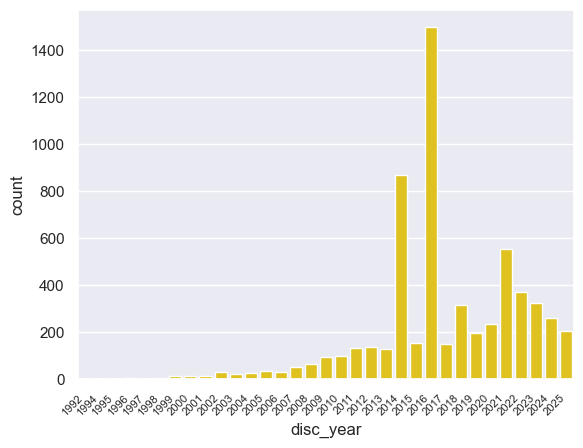

<Figure size 640x480 with 0 Axes>

In [353]:
#Barplot cantidad de planetas descubiertos x año
sns.countplot(x=disc_year, data= discovery_time, color='gold')
plt.xticks(rotation=45, ha='right', fontsize= 8)
plt.show()

plt.savefig(join('..', 'output-figures', 'planetas-por-año-histograma.png'), format='png')

##### Los gráficos que le siguen a este corresponden a gráficos de barra múltiple, que comparan la cantidad de exoplanetas descubiertos por año, entre los años 1992 y 2015 a tramos de 5 años (1990-2025), agrupados en barras por el método de descubrimiento utilizado.

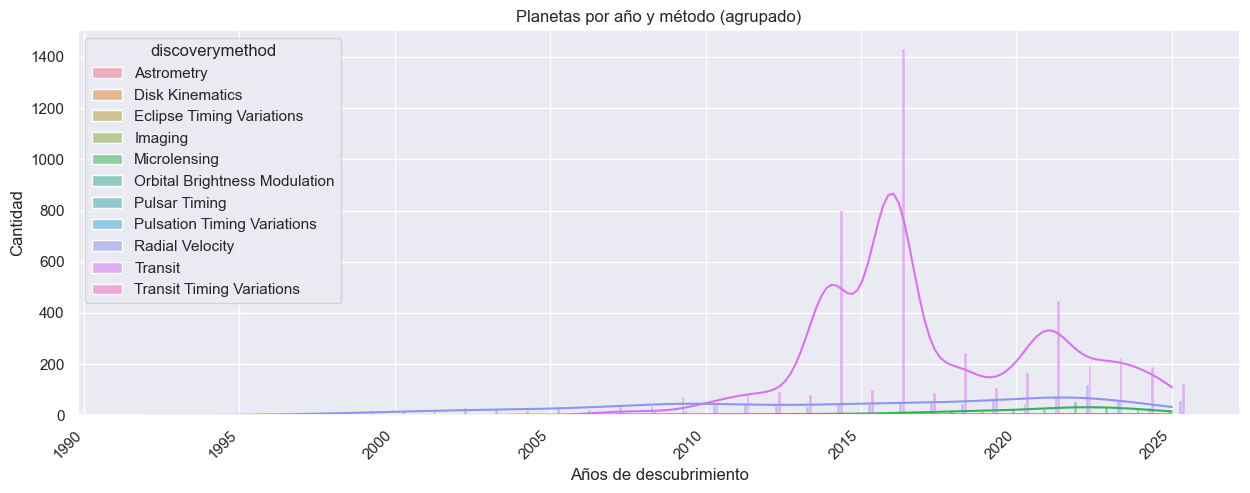

<Figure size 640x480 with 0 Axes>

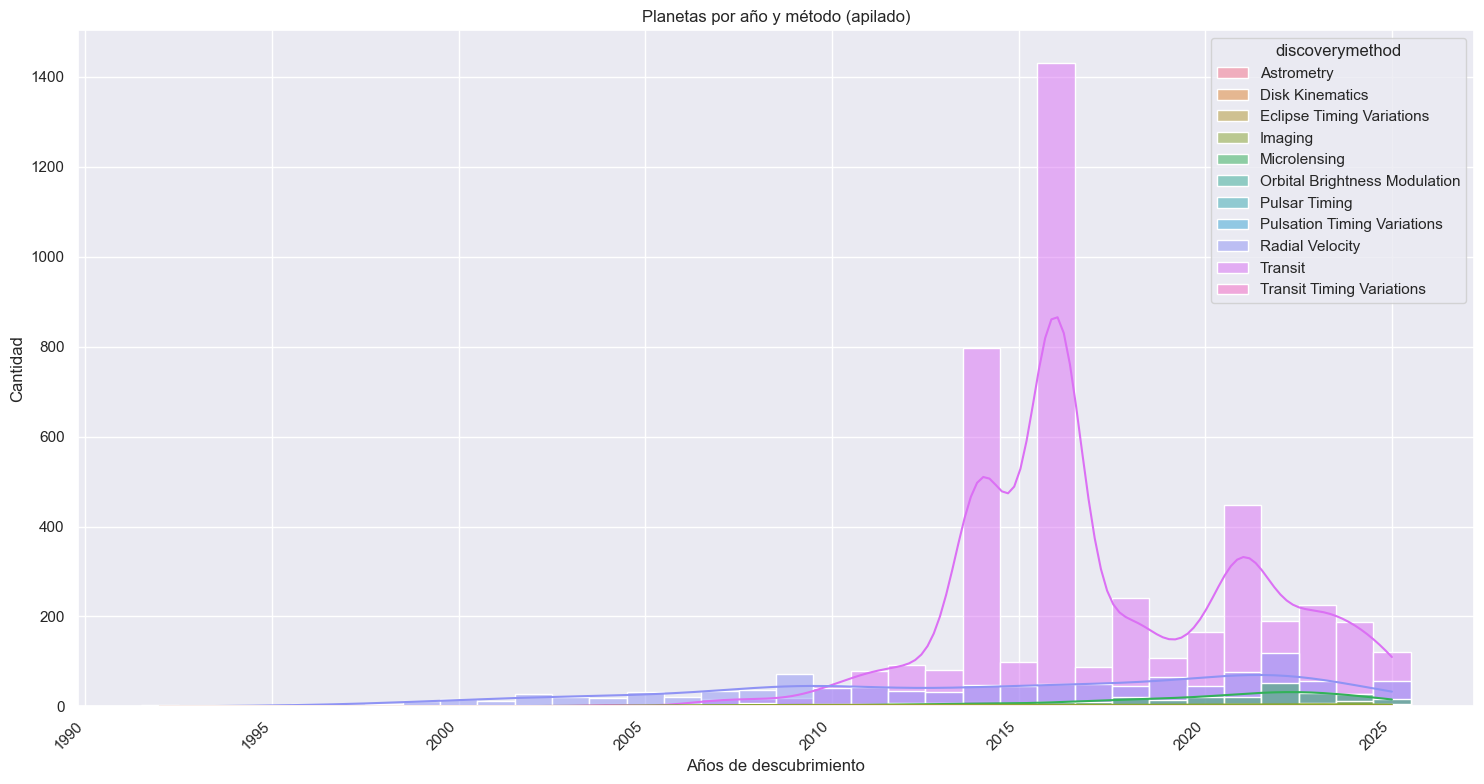

<Figure size 640x480 with 0 Axes>

In [354]:
sns.set_theme()

# Graf 1) Barras múltiples (agrupadas)
plt.figure(figsize=(15, 5))
sns.histplot(data=discovery_time, x=disc_year, hue=discoverymethod,
             multiple="dodge", discrete=True, legend=True, kde=True)
plt.xlabel('Años de descubrimiento'); plt.ylabel('Cantidad')
plt.title('Planetas por año y método (agrupado)'); plt.xticks(rotation=45, ha='right')
plt.show()
plt.savefig(join('..', 'output-figures', 'planetas-por-año-y-metodo-groupbars.png'), format='png')

# Graf 2) Barras apiladas
plt.figure(figsize=(15,8))
sns.histplot(data=discovery_time, x=disc_year, hue=discoverymethod,
             multiple="layer", discrete=True, kde=True)
plt.xlabel('Años de descubrimiento'); plt.ylabel('Cantidad')
plt.title('Planetas por año y método (apilado)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()
plt.savefig(join('..', 'output-figures', 'planetas-por-año-y-metodo-layeredbars.png'), format='png')

---

#### Gráfico de dispersión :
##### Este gráfico simula la distancia de cada exoplaneta descubierto respecto de la tierra, haciendo uso de las coordenadas celestes

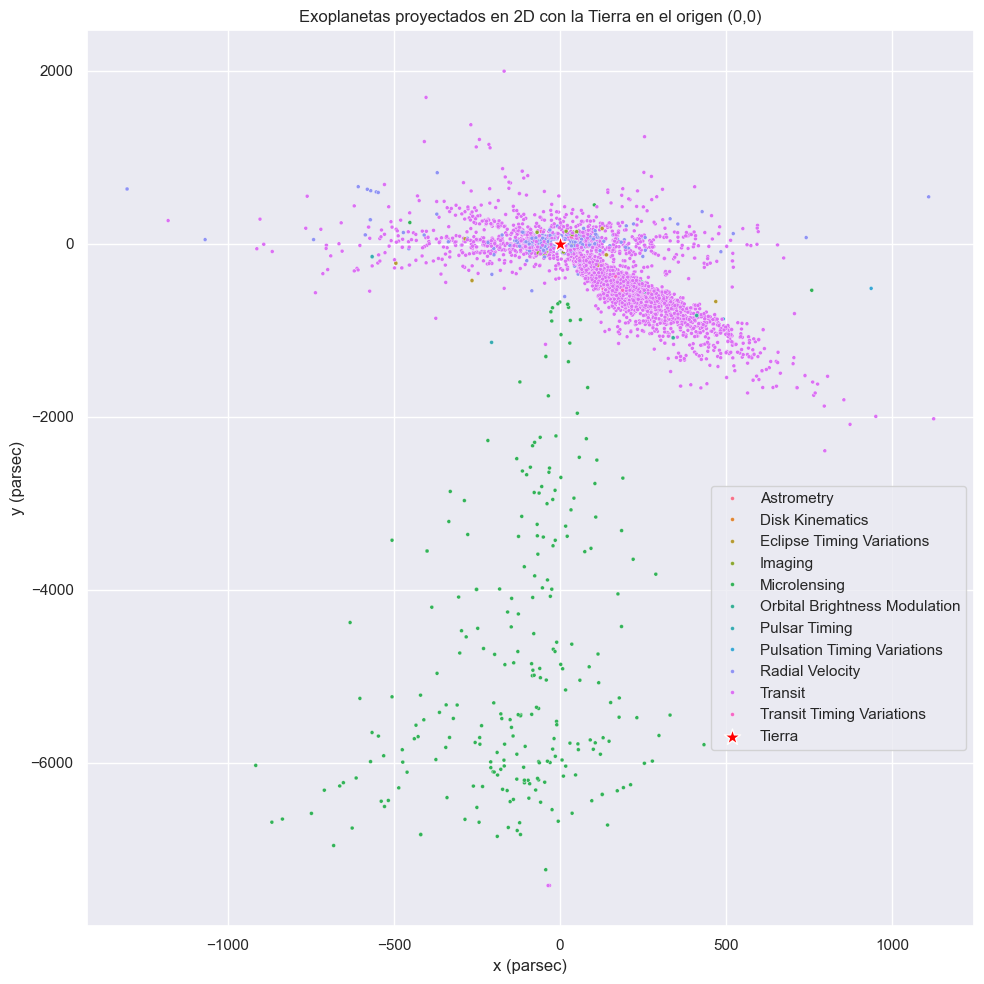

<Figure size 640x480 with 0 Axes>

In [355]:
df_exoplanets['x_pc'] = df_exoplanets['sy_dist'] * np.cos(np.deg2rad(df_exoplanets['dec'])) * np.cos(np.deg2rad(df_exoplanets['ra']))
df_exoplanets['y_pc'] = df_exoplanets['sy_dist'] * np.cos(np.deg2rad(df_exoplanets['dec'])) * np.sin(np.deg2rad(df_exoplanets['ra']))
df_exoplanets[disc_year] = df_discovery[disc_year]
df_exoplanets[disc_telescope] = df_discovery[disc_telescope]

exo_scatter = df_exoplanets.sort_values(by= [disc_year, discoverymethod], ascending=True, ignore_index=True).drop_duplicates(subset= ['pl_name'], keep='last')
plt.figure(figsize=(10,10))
sns.scatterplot(data=exo_scatter, x='x_pc', y='y_pc', hue = discoverymethod, s=8, alpha=1)
sns.scatterplot(x=[0], y=[0], color='red', marker='*', s=150, label='Tierra')

plt.gca().set_aspect('auto', adjustable='box')
plt.xlabel('x (parsec)')
plt.ylabel('y (parsec)')
plt.title('Exoplanetas proyectados en 2D con la Tierra en el origen (0,0)')
plt.legend(loc='upper right', bbox_to_anchor=(1, 0.5))
plt.tight_layout()
plt.show()
plt.savefig(join('..', 'output-figures', 'proyeccion-2d-exoplanetas-por-metodo-scatter.png'), format='png')

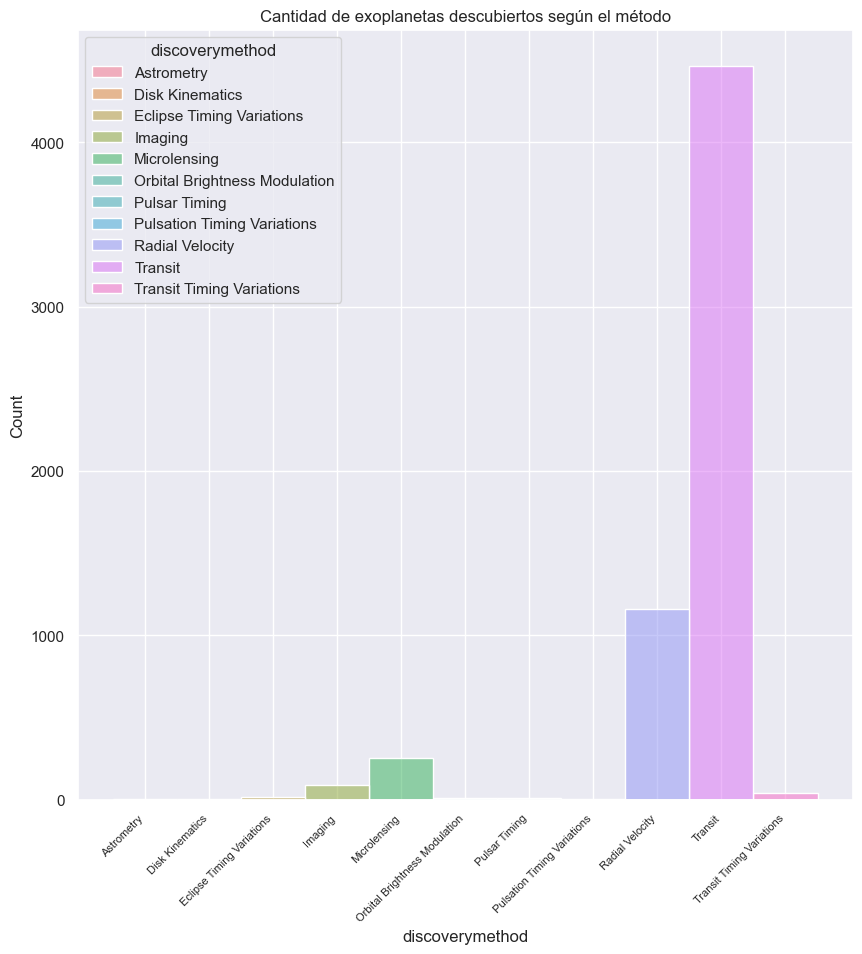

<Figure size 640x480 with 0 Axes>

In [356]:
#CANT. EXOPLANETAS DESCUBIERTOS SEGÚN EL MÉTODO
plt.figure(figsize=(10,10))
sns.histplot(data = exo_scatter, x=discoverymethod, color='gold', hue=discoverymethod, kde=True, discrete=True)
plt.title('Cantidad de exoplanetas descubiertos según el método')
plt.xticks(rotation=45, ha='right', fontsize= 8)
plt.show()
plt.savefig(join('..', 'output-figures', 'cantidad-exoplanetas-por-metodo-histograma.png'), format='png')

##### El siguiente gráfico, a diferencia del anterior, representa el número de registros totales de todas las observaciones de cada exoplaneta, esta vez agrupados por el telescopio utilizado. A partir de su visualización podemos observar lo siguiente: 


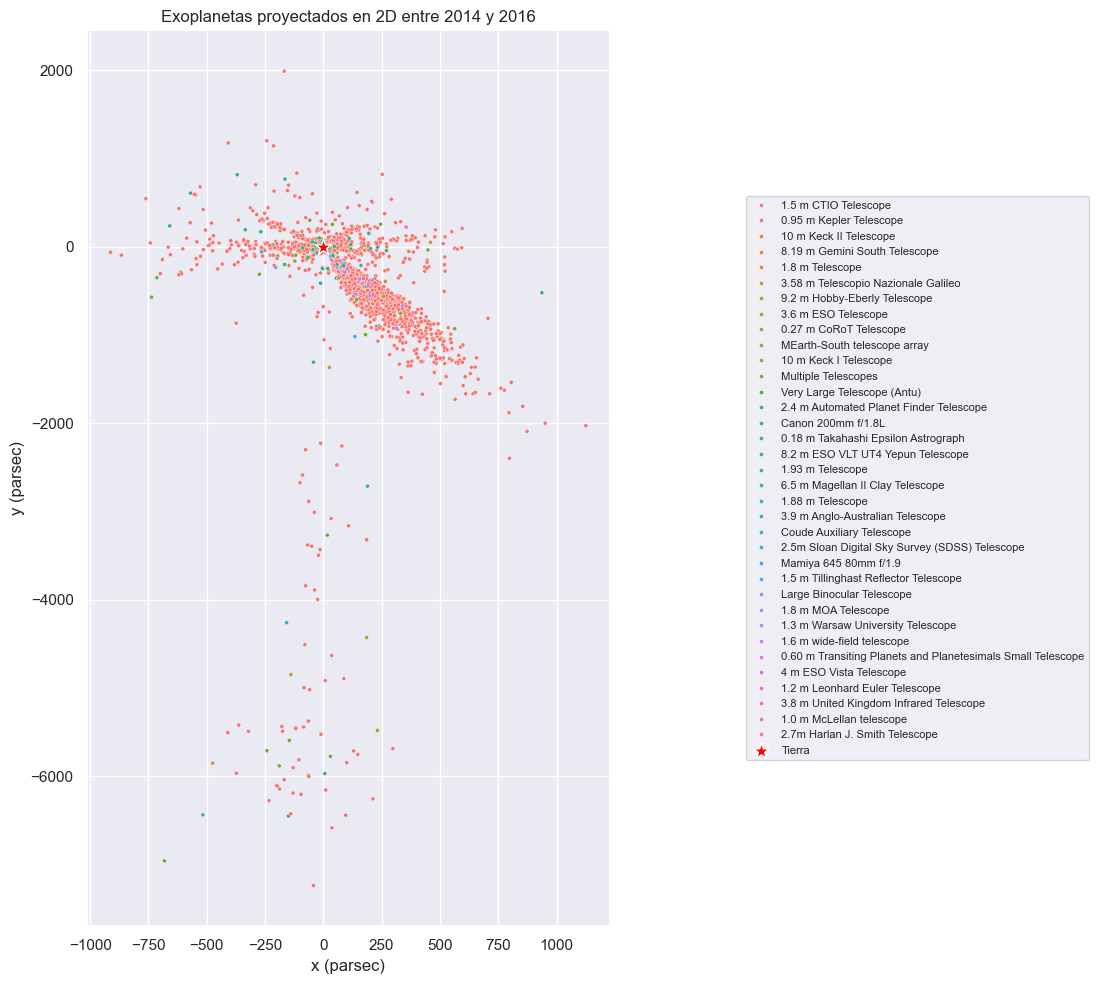

<Figure size 640x480 with 0 Axes>

In [357]:
#Aislamos los datos entre el 2014 y 2016

'''exo_range = df_exoplanets[df_exoplanets[soltype] == 'Published Confirmed']'''
exo_range = df_exoplanets[(df_exoplanets[disc_year] >= 2014) & (df_exoplanets[disc_year] <= 2016)]

plt.figure(figsize=(15, 10))
sns.scatterplot(data=exo_range, x='x_pc', y='y_pc', hue = disc_telescope, s=8, alpha=1)
sns.scatterplot(x=[0], y=[0], color='red', marker='*', s=150, label='Tierra')

plt.gca().set_aspect('auto', adjustable='box')
plt.xlabel('x (parsec)')
plt.ylabel('y (parsec)')
plt.title('Exoplanetas proyectados en 2D entre 2014 y 2016')
plt.legend(bbox_to_anchor=(1.25, 0.5), loc='center left', fontsize=8)
plt.tight_layout(rect=[0, 0, 0.85, 1])  
plt.show()
plt.savefig(join('..', 'output-figures', 'proyeccion-2d-exoplanetas-por-telescopio-2014-a-2016-scatter.png'), format='png')

In [358]:
# Número de observaciones totales según el telescopio utilizado
exo_range[disc_telescope].value_counts() 

disc_telescope
0.95 m Kepler Telescope                                        2234
Multiple Telescopes                                              66
Canon 200mm f/1.8L                                               61
0.18 m Takahashi Epsilon Astrograph                              25
10 m Keck I Telescope                                            17
3.6 m ESO Telescope                                              16
1.3 m Warsaw University Telescope                                14
1.93 m Telescope                                                 12
3.58 m Telescopio Nazionale Galileo                              11
Mamiya 645 80mm f/1.9                                             7
1.8 m Telescope                                                   7
0.27 m CoRoT Telescope                                            6
9.2 m Hobby-Eberly Telescope                                      5
1.8 m MOA Telescope                                               5
3.9 m Anglo-Australian Telescope 

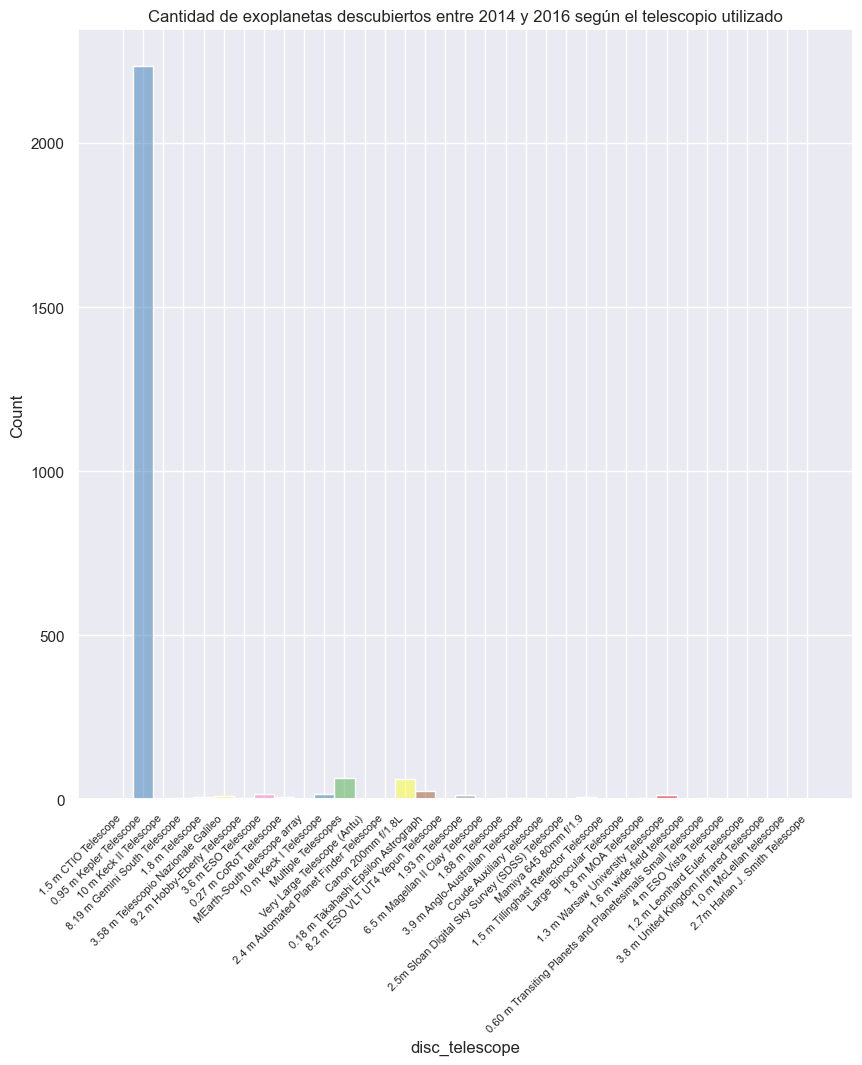

<Figure size 640x480 with 0 Axes>

In [359]:
plt.figure(figsize=(10,10)) ###
sns.histplot(data = exo_range, x=disc_telescope, color='gold', hue=disc_telescope, palette='Set1', legend=False)
plt.title('Cantidad de exoplanetas descubiertos entre 2014 y 2016 según el telescopio utilizado')
plt.xticks(rotation=45, ha='right', fontsize= 8)
plt.show()
plt.savefig(join('..', 'output-figures', 'cantidad-exoplanetas-por-telescopio-2014-a-2016-histograma.png'), format='png')

### Distancia promedio de un exoplaneta a la tierra:

Gracias a que logramos obtener la ubicación de los exoplanetas respecto de la tierra (con la tierra en el origen), ahora podemos hacer el cálculo de la distancia de cada exoplaneta registrado a la tierra tomando a cada exoplaneta como un vector y calcular el módulo para cada uno. Dado que estamos trabajando en el plano celeste bidimensional, la unidad de medida de la distancia se mide en parsecs. Por lo que aplicando la operación se obtiene :


In [360]:
#CÁLCULO DE LA DISTANCIA PROMEDIO EN 2D (unidad de medidad : parsecs)

#(pow optimiza la operación de potencias)
exo_scatter['earth_dist'] = np.sqrt(pow(exo_scatter['x_pc'], 2)+ pow(exo_scatter['y_pc'], 2)) #calculamos distancia
print(f'La distancia promedio de los exoplanetas divisados hasta la fecha respecto a tierra es de {exo_scatter['earth_dist'].mean()} parsecs.')


La distancia promedio de los exoplanetas divisados hasta la fecha respecto a tierra es de 549.4978255518711 parsecs.


## En búsqueda del exoplaneta promedio:
Una de las incógnitas más importantes de este proyecto es poder conocer qué propiedades físicas y cualidades caracterizan a la mayoría de los exoplanetas. Por lo que buscamos a partir de los datos del Nasa Exoplanet Archive, poder crear nuestro 'exoplaneta promedio' para responder a esa pregunta. De aquí se desprenden varias otras dudas las cuales es importante esclarecer para poder encaminarnos más cerca de nuestro objetivo :

### ¿Qué parametros definen si un planeta es similar o no a la tierra?

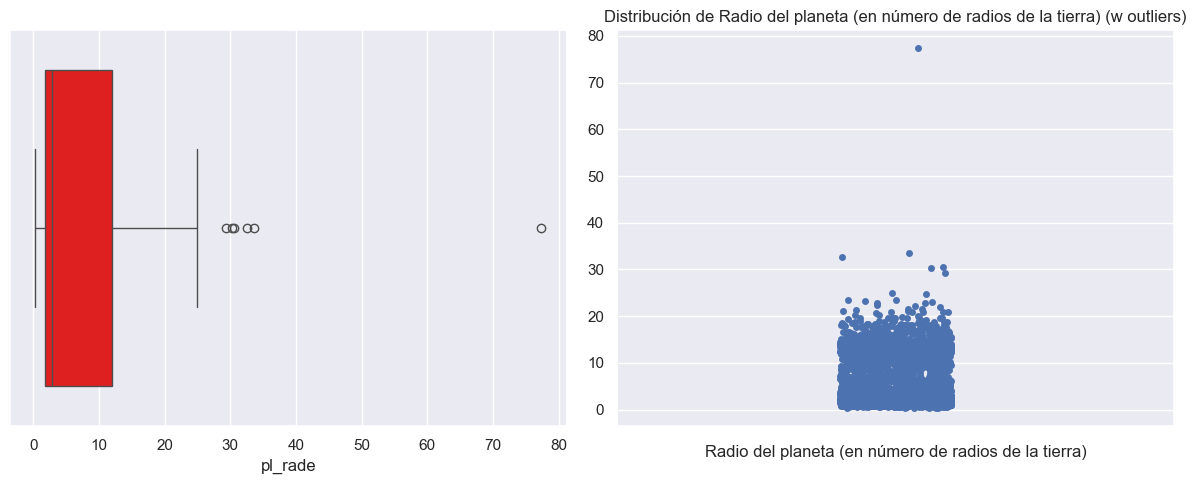

Valor promedio CON outliers: 5.799404911285549


<Figure size 640x480 with 0 Axes>

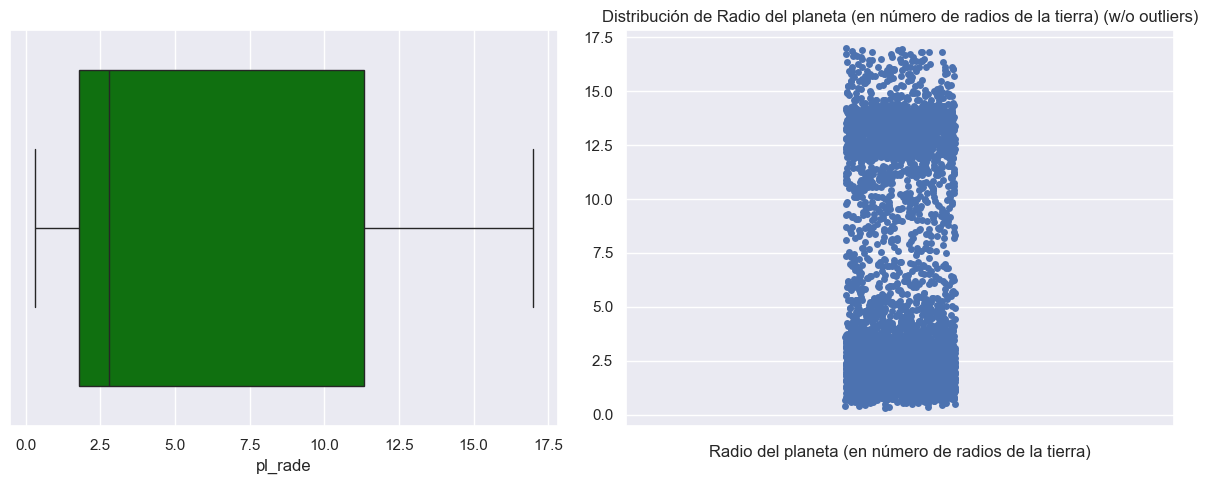

Valor promedio SIN outliers: 5.538086249715543


<Figure size 640x480 with 0 Axes>

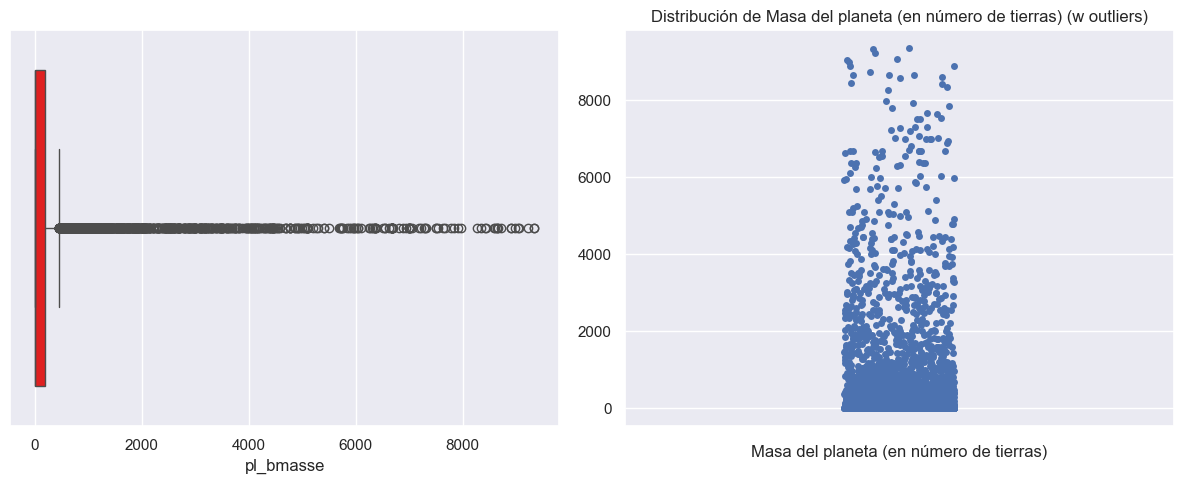

Valor promedio CON outliers: 387.5853567852381


<Figure size 640x480 with 0 Axes>

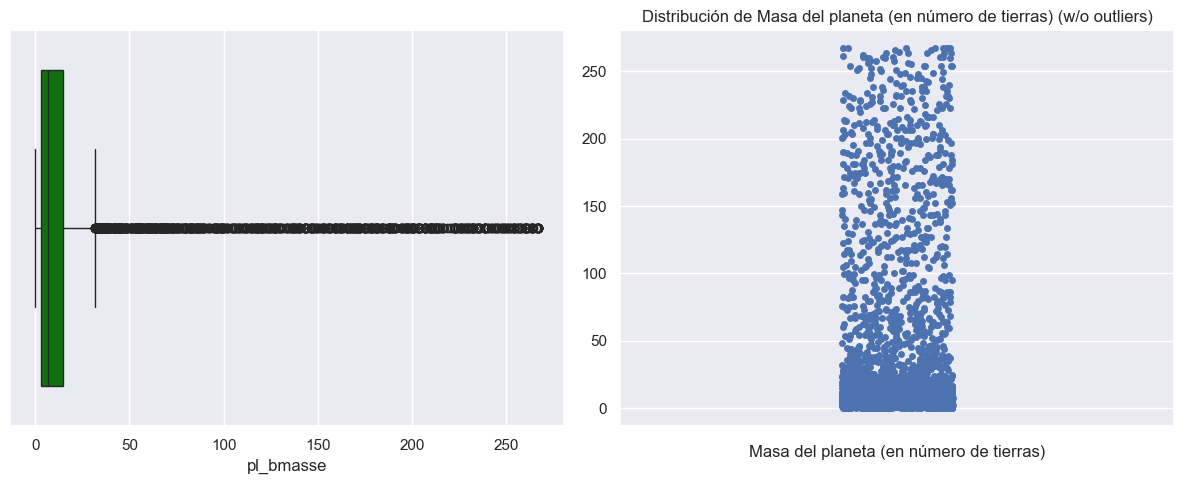

Valor promedio SIN outliers: 27.36013327945585


<Figure size 640x480 with 0 Axes>

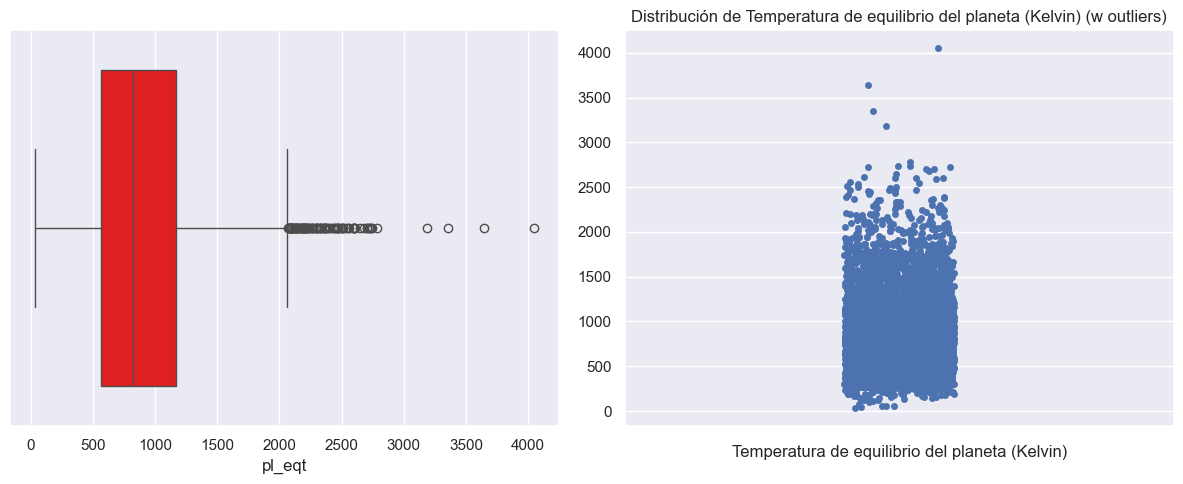

Valor promedio CON outliers: 915.3255168589175


<Figure size 640x480 with 0 Axes>

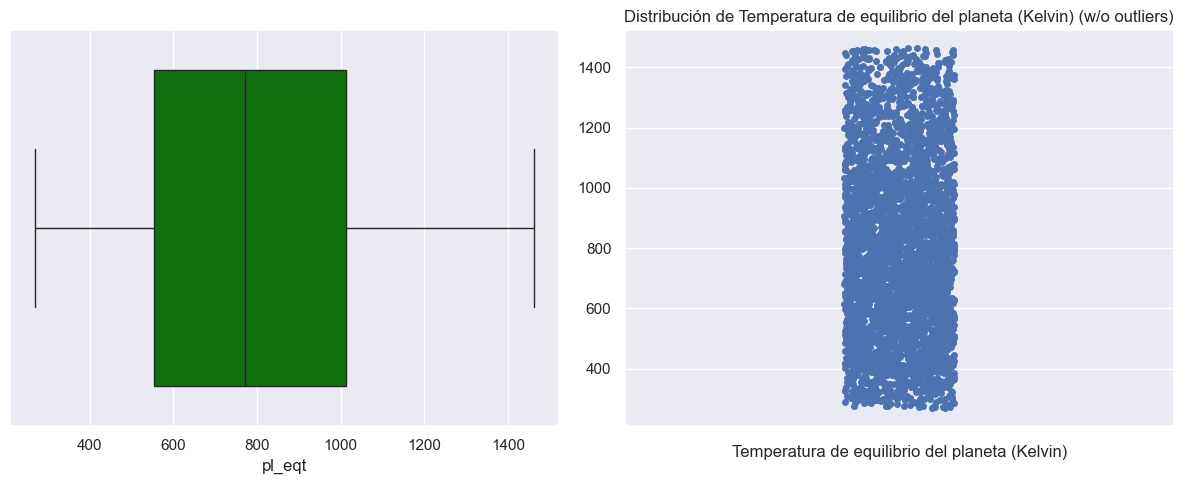

Valor promedio SIN outliers: 797.4989299763965


<Figure size 640x480 with 0 Axes>

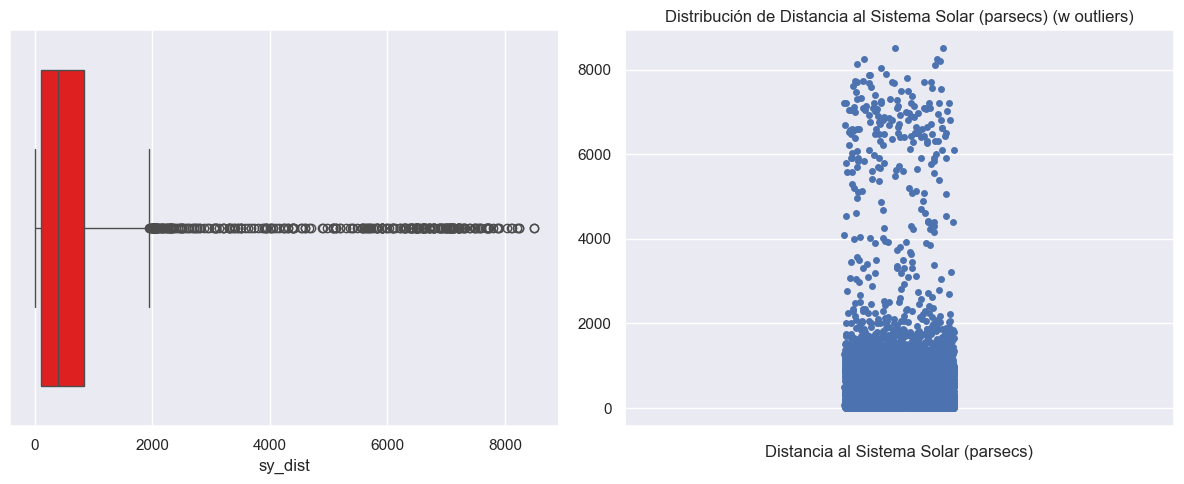

Valor promedio CON outliers: 703.3810519927852


<Figure size 640x480 with 0 Axes>

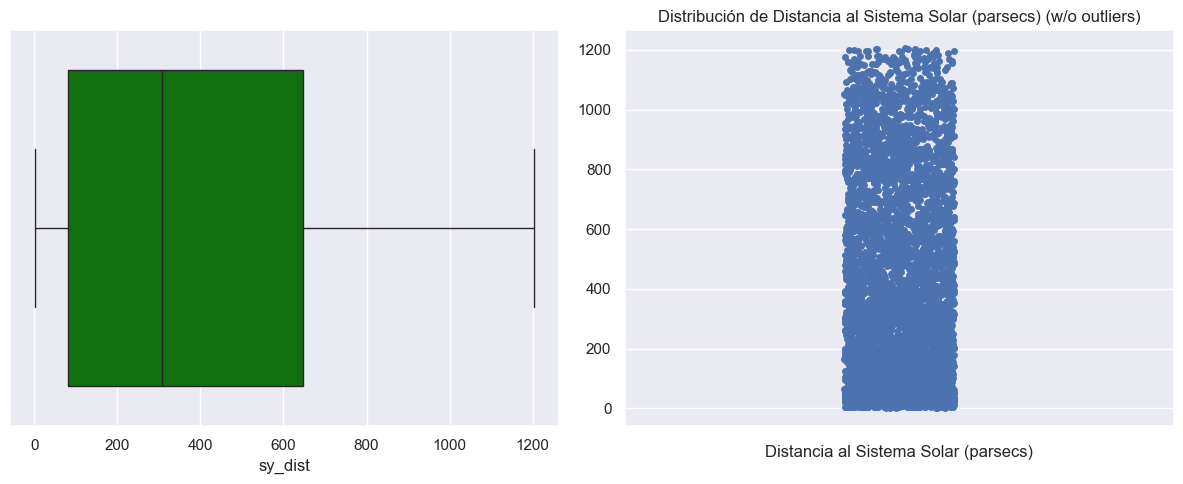

Valor promedio SIN outliers: 392.9804013568355


<Figure size 640x480 with 0 Axes>

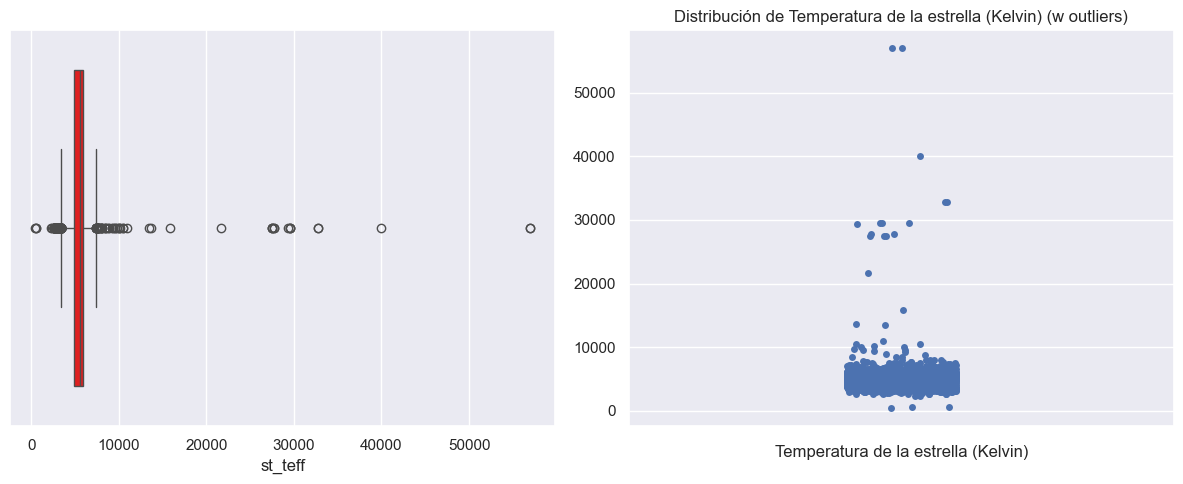

Valor promedio CON outliers: 5407.255387287252


<Figure size 640x480 with 0 Axes>

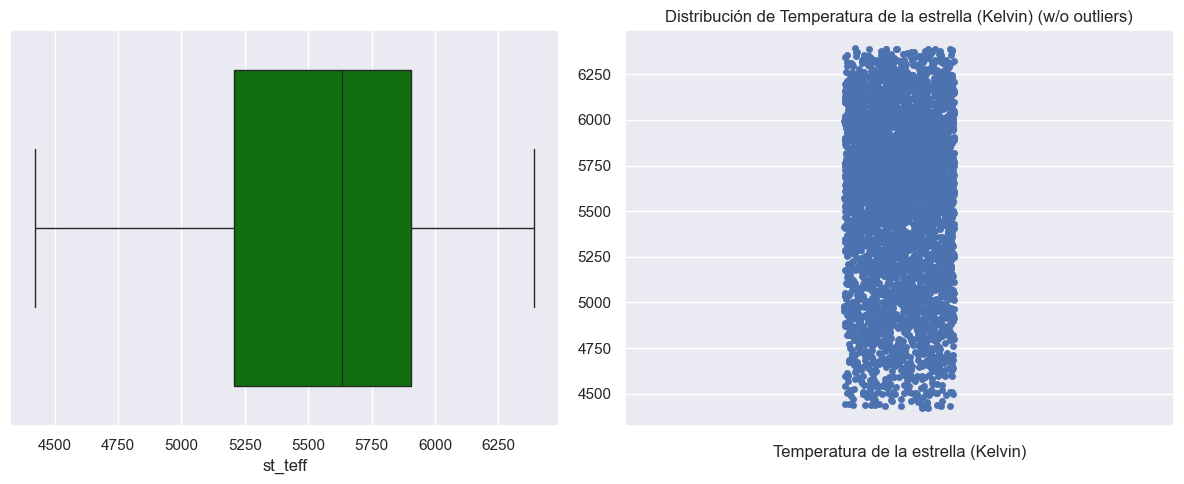

Valor promedio SIN outliers: 5552.213359879466


<Figure size 640x480 with 0 Axes>

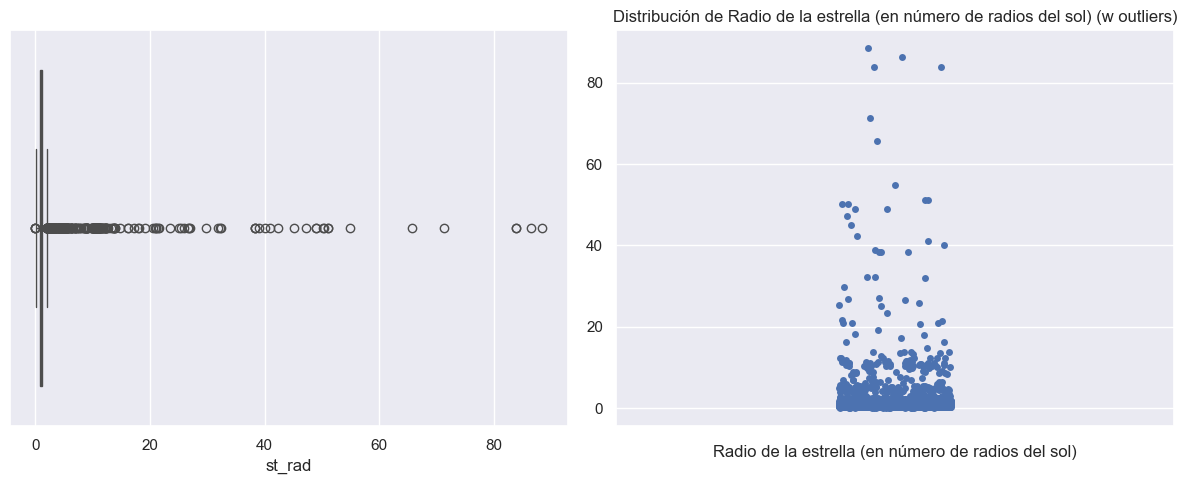

Valor promedio CON outliers: 1.5138891011863223


<Figure size 640x480 with 0 Axes>

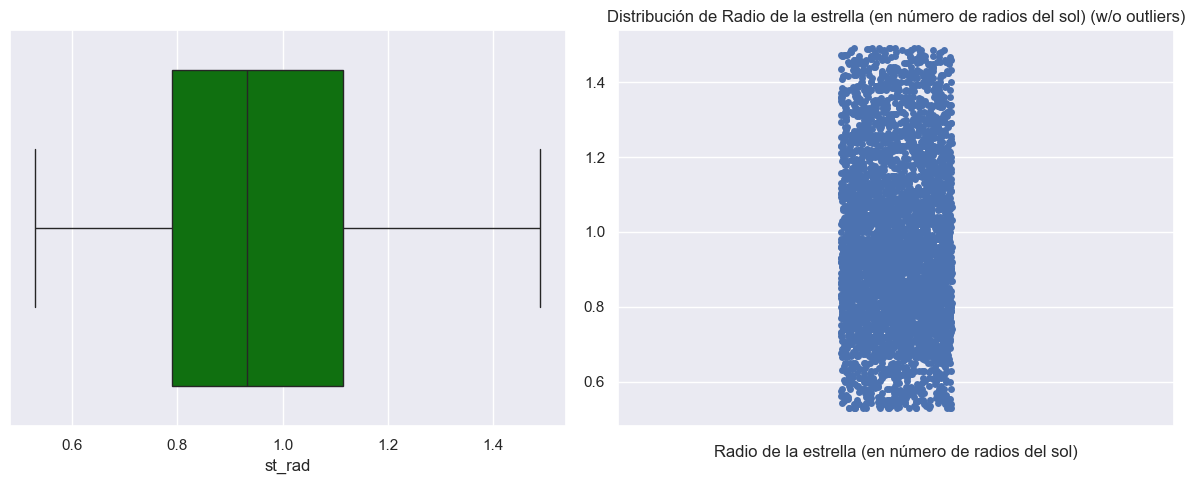

Valor promedio SIN outliers: 0.9620110271985495


<Figure size 640x480 with 0 Axes>

In [361]:
dict = {
    'pl_rade':  'Radio del planeta (en número de radios de la tierra)',
    'pl_bmasse':'Masa del planeta (en número de tierras)',
    'pl_eqt':   'Temperatura de equilibrio del planeta (Kelvin)',
    'sy_dist':  'Distancia al Sistema Solar (parsecs)',
    'st_teff':  'Temperatura de la estrella (Kelvin)',
    'st_rad':   'Radio de la estrella (en número de radios del sol)',
}

#Usar este dataframe para el exoplaneta promedio
exo_clean = df_exoplanets.copy()

for col, label in dict.items():
    serie = exo_clean[col]

    fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))
    sns.boxplot(x=serie, color= "red", ax=ax[0])
    sns.stripplot(y=serie, jitter=True, ax=ax[1])

    plt.xlabel(label)
    plt.ylabel('')
    plt.title(f"Distribución de {label} (w outliers)")
    plt.tight_layout()
    plt.show()
    print(f'Valor promedio CON outliers: {serie.mean()}')
    plt.savefig(join('..', 'output-figures', f'distribucion-{col}-con-outliers-boxplot.png'), format='png')
    
    #Vamos a eliminar los outliers manualmente:
    q1 = serie.quantile(0.25)
    q3 = serie.quantile(0.75)
    rango_intercuartil = q3 - q1
    lim_sup = q1 + (1.5 * rango_intercuartil)
    lim_inf = q3 - (1.5 * rango_intercuartil)
    
    no_outliers = serie[(serie >= lim_inf) & (serie <= lim_sup)]

    fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))
    sns.boxplot(x=no_outliers, color= "green", ax=ax[0])
    sns.stripplot(y=no_outliers, jitter=True, ax=ax[1])

    plt.xlabel(label)
    plt.ylabel('')
    plt.title(f"Distribución de {label} (w/o outliers)")
    plt.tight_layout()
    plt.show()
    print(f'Valor promedio SIN outliers: {no_outliers.mean()}')
    plt.savefig(join('..', 'output-figures', f'distribucion-{col}-clean-boxplot.png'), format='png')


<Axes: xlabel='hostname', ylabel='num_planets'>

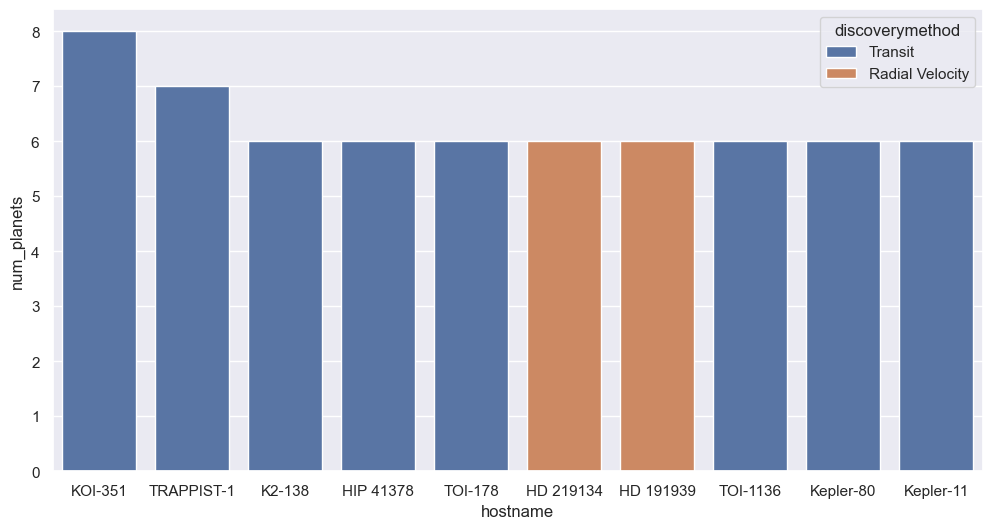

In [362]:
# ¿Qué sistemas planetarios tienen más planetas detectados, a qué se le podría atribuir esto? 

df_systems = df[["hostname", "pl_name", "sy_snum", "discoverymethod"]].copy()
df_systems_grouped = df_systems.groupby("hostname").agg({
    "pl_name": "count",
    "sy_snum": "first",
    "discoverymethod": lambda x: x.mode()[0]
}).rename(columns={"pl_name": "num_planets"})


# Grafico
plt.figure(figsize=(12, 6))
sns.barplot(data=df_systems_grouped.sort_values(by="num_planets", ascending=False).head(10),
            x=df_systems_grouped.sort_values(by="num_planets", ascending=False).head(10).index,
            y="num_planets", hue="discoverymethod", dodge=False)

### Modelo de ML (Clustering) 
Espacio destinado para poder agrupar a los exoplanetas por tipo (gaseoso/rocoso maybe, la idea es hacer un modelo de clasificación, el q más se acomode a la distribución de nuestros datos y ojalá que haya un gráfico de respaldo para cada cosita para que sea bien visual todo y se entienda por qué lo elegimos) 

Para poder agrupar lo planetas, se consideró las caracteristicas que definen un planeta, Para ello se busco informacion en diferentes fuentes para establecer los parametros para poder clasificar los planetas.


Planetas Rocosos: similares a la Tierra o Marte, por lo que algunos son aptos para vivir con ciertas condiciones

Super-Tierras: rocosos más grandes que la Tierra, por lo que aun pueden ser habitables, dependiendo de su temperatura y orbitas.

Los siguientes tipos de exoplanetas en gerneral ya no son habitables, por poseer temperaturas extremas:

* Sub-Neptunos / Mini-Neptunos: tienen helio.

* Neptunianos: como neptuno planetas helados y gaseosos

* Gigantes Gaseosos: compuhidrógeno y helio, como Júpiter o Saturno.

* Enanas Marrones: muy grandes por lo que estan entre planeta y estrella

Referencias Científicas

Fulton, B. J., & Petigura, E. (2017). The California-Kepler Survey: a gap in the radius distribution of small planets.
(https://www.benjaminfulton.com/files/20170331_aspen.pdf)

Chen, J., & Kipping, D. (2017). A Probabilistic Mass–Radius Relationship for Exoplanets.
(https://arxiv.org/abs/1603.08614)

Weiss, L., & Marcy, G. (2014). The Mass-Radius Relation for 65 Exoplanets.
https://www.researchgate.net/publication/259105987_The_Mass-Radius_Relation_Between_65_Exoplanets_Smaller_than_4_Earth_Radii

Fortney, J. et al. (2007). Planetary Structure Models for Gas Giants.
https://www.ucolick.org/~jfortney/papers/Fortney07.pdf

Burrows, A. et al. (1997). Theory and Limits of Brown Dwarfs.
(https://arxiv.org/abs/1008.5150)

Revisited Mass‑Radius Relations for Exoplanets below 120 Earth Masses (Otegi et al., 2020)
https://arxiv.org/pdf/1911.04745

In [363]:
#clasificacion datos bibliografia

clasificacion = {
    "Categoría": [
        "Rocoso",
        "Super-Tierra",
        "Sub-Neptuno / Mini-Neptuno",
        "Neptuniano",
        "Gigante Gaseoso",
        "Enana Marrón candidata"
    ],
    
    "Rango de masa (Masa en Tierras)": [
        "< 3",
        "3 - 10",
        "10 - 50",
        "50 - 200",
        "200 - 4132",
        "> 4132"
    ],

    "Rango de radio (Radio en Tierras)": [
        "< 1.6",
        "1.6 - 2.5",
        "2.5 - 4.0",
        "4 - 6",
        "> 6",
        "no especificado"
    ],
    
    "Referencia científica": [
        "Fulton & Petigura (2017)",
        "Weiss & Marcy (2014)",
        "Weiss & Marcy (2014)",
        "Chen & Kipping (2017), Fortney (2007)",
        "Fortney et al. (2007), NASA Exoplanet Archive",
        "Spiegel, Burrows & Milsom (2010), IAU"
    ],
    
    "Qué aportó la referencia": [
        "Identificaron el 'radio-valle' (~1.6) que separa planetas rocosos de gaseosos.",
        "Definieron el rango 1.6–2.5 como transición entre roca y atmósfera significativa.",
        "Establecieron rango 2.5–4.0 como Sub-Neptunos (núcleo + gas).",
        "Modelaron relación masa-radio para clase tipo Neptuno.",
        "Definieron valores típicos para gigantes gaseosos dominados por hidrógeno.",
        "Establecieron el límite físico de 13 masas de Júpiter (~4132 tierras)."
    ]
}

df_clasificacion = pd.DataFrame(clasificacion)
df_clasificacion


,Categoría,Rango de masa (Masa en Tierras),Rango de radio (Radio en Tierras),Referencia científica,Qué aportó la referencia
0,Rocoso,< 3,< 1.6,Fulton & Petigura (2017),Identificaron el 'radio-valle' (~1.6) que sepa...
1,Super-Tierra,3 - 10,1.6 - 2.5,Weiss & Marcy (2014),Definieron el rango 1.6–2.5 como transición en...
2,Sub-Neptuno / Mini-Neptuno,10 - 50,2.5 - 4.0,Weiss & Marcy (2014),Establecieron rango 2.5–4.0 como Sub-Neptunos ...
3,Neptuniano,50 - 200,4 - 6,"Chen & Kipping (2017), Fortney (2007)",Modelaron relación masa-radio para clase tipo ...
4,Gigante Gaseoso,200 - 4132,> 6,"Fortney et al. (2007), NASA Exoplanet Archive",Definieron valores típicos para gigantes gaseo...
5,Enana Marrón candidata,> 4132,no especificado,"Spiegel, Burrows & Milsom (2010), IAU",Establecieron el límite físico de 13 masas de ...


In [364]:
df.describe()[["pl_bmasse", "pl_rade", "pl_dens", "pl_bmasse"]]

,pl_bmasse,pl_rade,pl_dens,pl_bmasse
count,6006.000000,6013.000000,5929.000000,6006.000000
mean,387.585357,5.799405,4.920427,387.585357
std,1101.080392,5.341732,34.774437,1101.080392
min,0.020000,0.309800,0.005100,0.020000
25%,4.130000,1.820000,1.304000,4.130000
50%,9.095000,2.830000,2.560000,9.095000
75%,181.162873,11.937564,4.600000,181.162873
max,9344.155166,77.342100,2000.000000,9344.155166


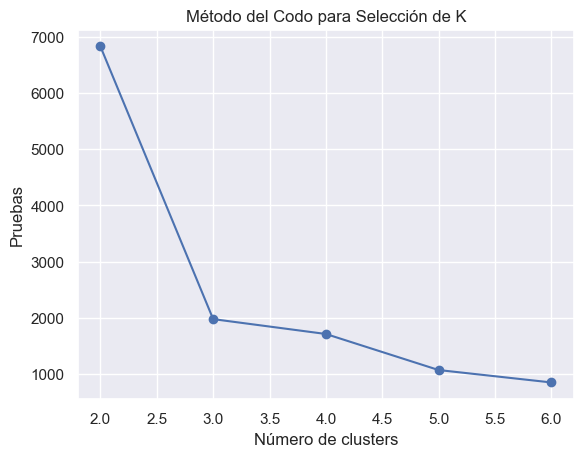

In [365]:
#copia
df2 = df_exoplanets.copy()


# Selección de variables relevantes para clusterización
vars_cluster = ["pl_bmasse", "pl_rade"]  

# Eliminamos filas con valores faltantes en estas variables
df2 = df2.dropna(subset=vars_cluster)

# Creamos la matriz numérica para clusterización
X = df2[vars_cluster]


# Se normaliza para evitar que variables con numeros grandes como masa a diferencia como la densidad
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pruebas= []
K = range(2, 7)  # probamos de 2-7

for k in K:
    knn = KMeans(n_clusters=k, random_state=42)
    knn.fit(X_scaled)
    pruebas.append(knn.inertia_)

plt.plot(K, pruebas, marker='o')
plt.title("Método del Codo para Selección de K")
plt.xlabel("Número de clusters")
plt.ylabel("Pruebas")
plt.show()


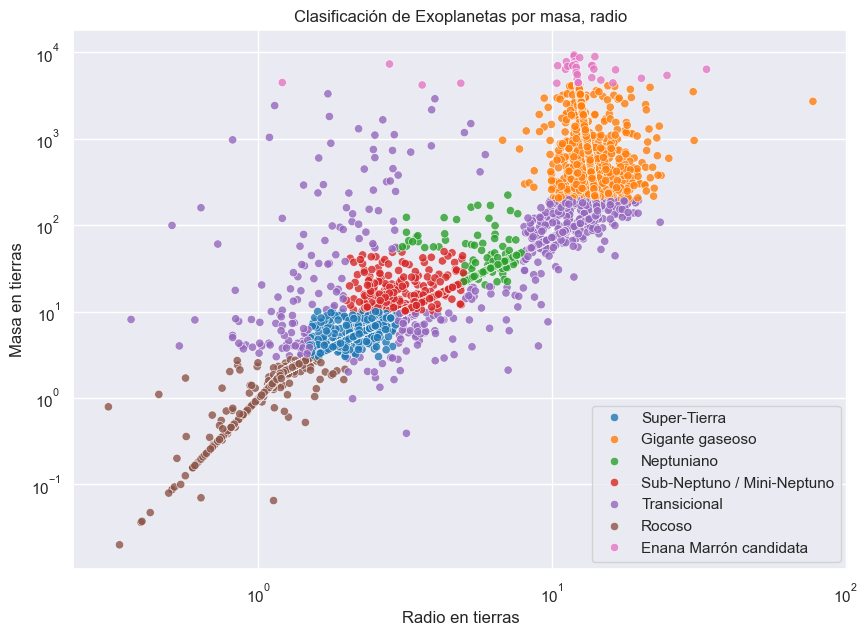

In [366]:
k = 3

kmeans = KMeans(n_clusters=k, random_state=42)
df2["cluster"] = kmeans.fit_predict(X_scaled)

def clasificar_exoplaneta(masa, radio):

    # Muy pesado la enana
    if masa >= 4132:
        return "Enana Marrón candidata"
    
    # Rocosos 
    if radio < 2  and masa < 3:
        return "Rocoso"
    
    # Super-Tierras
    if 1.5 <= radio <= 3 and 3 <= masa <= 10 :
        return "Super-Tierra"
    
    # Sub-Neptunos
    if 2 <= radio <= 5 and 10 <= masa <= 50:
        return "Sub-Neptuno / Mini-Neptuno"
    
    # Neptunianos
    if 3 <= radio <= 8 and 20 <= masa <= 300:
        return "Neptuniano"
    
    # Gigantes gaseosos
    if radio > 6 and masa > 200:
        return "Gigante gaseoso"
    

    return "Transicional"



df2["tipo_exoplaneta"] = df2.apply(
    lambda row: clasificar_exoplaneta(
        row["pl_bmasse"],
        row["pl_rade"],
    ),
    axis=1
)

plt.figure(figsize=(10, 7))
sns.scatterplot(
    data=df2,
    x="pl_rade",
    y="pl_bmasse",
    hue="tipo_exoplaneta",
    palette="tab10",
    alpha=0.8
)
plt.xscale("log")
plt.yscale("log")
plt.xlabel("Radio en tierras")
plt.ylabel("Masa en tierras")
plt.title("Clasificación de Exoplanetas por masa, radio")
plt.legend()
plt.show()


In [367]:
#contar cuantos tipos de exoplanetas hay
conteo = df2["tipo_exoplaneta"].value_counts().reset_index()
conteo.columns = ["tipo_exoplaneta", "Cantidad"]
print(conteo)
conteo = df2["tipo_exoplaneta"].value_counts(normalize=True) * 100
print(conteo)

              tipo_exoplaneta  Cantidad
0                Super-Tierra      1946
1             Gigante gaseoso      1265
2                      Rocoso       988
3                Transicional       786
4  Sub-Neptuno / Mini-Neptuno       656
5                  Neptuniano       210
6      Enana Marrón candidata       138
tipo_exoplaneta
Super-Tierra                  32.492904
Gigante gaseoso               21.122057
Rocoso                        16.496911
Transicional                  13.124061
Sub-Neptuno / Mini-Neptuno    10.953415
Neptuniano                     3.506428
Enana Marrón candidata         2.304224
Name: proportion, dtype: float64


Por lo tanto los tipos de exoplanetas mas predominantes en el dataset seon los tipo "Super-tierra", son mas grande que la tierra , lo cual corresponde a las tendencias dadas por Estudios del catálogo del archivo de la NASA siendo esta la clase más común detectada hasta ahora, superando en número a los gigantes gaseosos o a los planetas rocosos del tamaño de la Tierra. (Batalha 2014; NASA Science, 2025).

Después tenemos al "Gigante gaseoso" que es un tipo de planeta de los mas comunes y finalmente los neptunionanos y enanas son menos ya que son menos numerosos, según las tendencias dadas por la NASA.
Los transicionales, corresponden a tipos de planetas con varias caracteristicas por lo que no es posible englobarlo en solo un tipo.

In [368]:
tierra_referencia = {
    "pl_insol": 1.0,     # Insolación
    "pl_rade": 1.0,      # Radio
    "pl_eqt": 255.0,     # Temp Equilibrio
    "pl_dens": 5.51,     # Densidad
    "pl_orbper": 365.25, # Días del año
    "st_teff": 5772.0,   # Temp Estrella (Sol)
}

tolerancias = {
    "pl_insol": 0.5,
    "pl_rade": 0.5,
    "pl_eqt": 0.2,
    "pl_dens": 0.5,
    "pl_orbper": 0.3,
    "st_teff": 0.3,
}

weights = {
    "pl_insol": 3.0,
    "pl_rade": 3.0,
    "pl_eqt": 2.0,
    "pl_dens": 1.0,
    "pl_orbper": 1.0,
    "st_teff": 1.0,
}


def similarity_score(value, reference, tolerance):
    if pd.isna(value) or pd.isna(reference):
        return None
    
    error = abs(value - reference) / abs(reference)
    
    if error > tolerance:
        return 0.0
    
    score = 1.0 - (error / tolerance)
    return score


def habitable_score(planet):
    total_score = 0.0
    total_weight = 0.0
    
    for feature, reference in tierra_referencia.items():
        value = planet[feature]
        tolerance = tolerancias[feature]
        weight = weights[feature]
        
        score = similarity_score(value, reference, tolerance)
        
        if score is None:
            continue
        
        total_score += score * weight
        total_weight += weight
    
    if total_weight == 0:
        return 0.0
    
    return total_score / total_weight * 100


df2["habitable_score"] = df2.apply(habitable_score, axis=1)

df2.head()


# Grafico

# Top 10 exoplanetas más habitables con su %
top_habitable = df2.sort_values(by='habitable_score', ascending=False)
top_habitable[['tipo_exoplaneta', 'habitable_score']]

,tipo_exoplaneta,habitable_score
1511,Rocoso,97.825862
2590,Rocoso,81.322142
1574,Rocoso,79.660411
4307,Rocoso,73.005445
2039,Rocoso,72.170967
...,...,...
278,Gigante gaseoso,0.000000
280,Transicional,0.000000
282,Neptuniano,0.000000
283,Transicional,0.000000


C:\Users\espeo\AppData\Local\Temp\ipykernel_8244\3900333836.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_habitable, x='tipo_exoplaneta', y='habitable_score', palette='viridis')


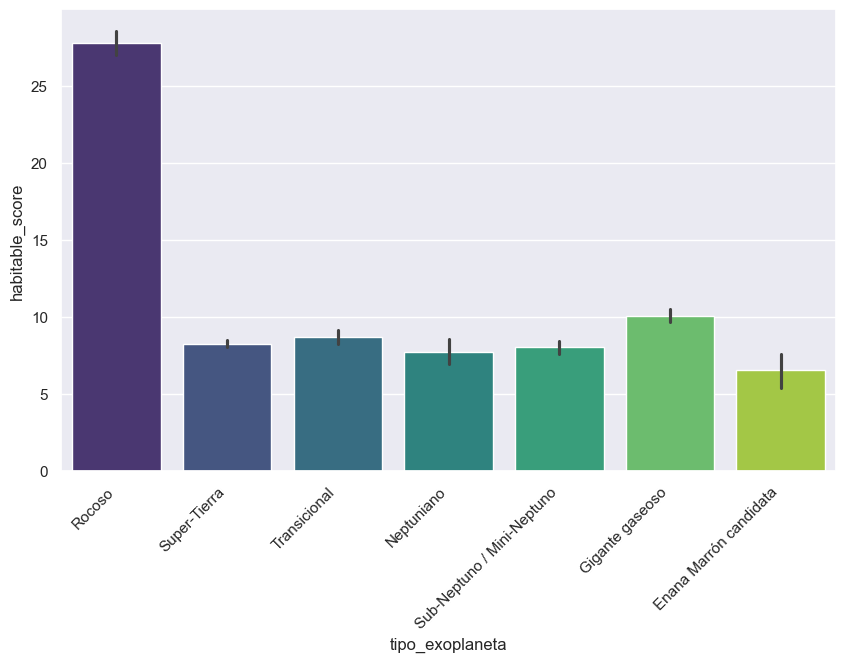

In [369]:
# Grafico de barras de los 10 exoplanetas más habitables
plt.figure(figsize=(10,6))
sns.barplot(data=top_habitable, x='tipo_exoplaneta', y='habitable_score', palette='viridis')
plt.xticks(rotation=45, ha='right')
plt.show()

Con este grafico de barras podemos ver que el tipo de exoplaneta con mayor probabilidad de habitabilidad es el rocos, lo cual concuerda coon la informacion, ya que la tierra es un tipo de planeta rocoso, con una superficie solida y metales, además ubicado mas cerca del sol, por lo que posee una temperatura mas elevada, necesaria para subsistir.

## ¿Será posible mejorar la visualización y la interpretación de la información que nos entrega el dataset para una persona que no es familiar con los datos? . . .

### Exoplanet Visualizer

Guardaremos una copia del 'df_exoplanets' con el objetivo de generar modelos 3D que simulen y permitan visualizar el comportamiento de cada sistema y sus órbitas, con los respectivos exoplanetas de los cuales hay información suficiente como para ser representados. Por practicidad y temas de orden, el código puede ser encontrado en el notebook titulado 'planet_visualizer.ipynb' ubicado dentro de esta misma carpeta 'notebooks' destinado a cumplir con este objetivo utilizando las herramientas que nos facilita la librería 'rebound' de python. (En caso de no tenerla es necesario instalarla previamente a ejecutar dicho notebook).

In [370]:
#este datset se aloja en la carpeta 'data' junto a el csv inicial que tomamos del nasa exoplanet archive
df_exoplanets.to_csv(join('..', 'data', 'exoplanets_physics_data.csv'), index_label='rowid')